<h1><center>Supervised Learning</center></h1>
<h1><center>ReCell Project</center></h1>

## Problem Statement



### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [266]:
# this will help in making the Python code more structured automatically (good coding practice)
#%load_ext nb_black
!pip install colorama

import colorama
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

from scipy.stats import skew

from colorama import Fore , Back, Style

## Loading the dataset

In [267]:
# loading data
data = pd.read_csv("/content/sample_data/used_device_data.csv")

In [268]:
# copy to a new dataframe to avoid any changes in the original data
df = data.copy()

## Data Overview

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

In [269]:
def basic_dataframe_info(df):

  # view a few rows of the data frame


  print(Fore.RED + f" 1. First few rows of dataset", end='\n\n', sep='\n\n');
  display(df.head())

  # view a last rows of the data frame
  print(Fore.RED + f"\n\n2. Last few rows of dataset", end='\n\n', sep='\n\n');
  display(df.tail())

  # view the shape of the data frame
  print(Fore.RED + "\n\n3. There are {0} rows and {1} columns in the dataframe".format(df.shape[0],df.shape[1]))

  # check the data types of the columns in the data frame
  print(Fore.RED + f"\n\n4. Data types of the columns", end='\n\n', sep='\n\n');
  display(df.dtypes)

  ### Check for missing values
  # missing value check
  print(Fore.RED + f"\n\n5. Missing values in columns", end='\n\n', sep='\n\n');
  print(df.isna().sum())

  #Find Unique values and their count
  unique_counts = pd.DataFrame.from_records([(col, df[col].nunique(),df[col].unique().tolist()) for col in df.select_dtypes(exclude=['int64','float64']).columns],
                          columns=['Column Name', 'Unique Count', 'Unique Value',]).sort_values(by=['Unique Count'])
  print(Fore.RED +f"\n\n6. Unique values and their count", end='\n\n', sep='\n\n');
  display(unique_counts)

  #Find  values and their count/frequency of categorical variable
  category_cols= df.select_dtypes(exclude=['int64','float64']).columns.tolist()
  print(Fore.RED +f"\n\n7. Frequency of categorical variable", end='\n\n', sep='\n\n');
  display(pd.DataFrame(
    df[category_cols]
    .melt(var_name='Category Type column', value_name='value')
    .value_counts())
.rename(columns={0: 'count'})
.sort_values(by=['Category Type column']))

  #Check for duplicate values
  #df.duplicated().sum()
  print(Fore.RED +f"\n\n8. There are {0} duplicated values",df.duplicated().sum(),  end='\n\n', sep='\n\n');
  #display(category_cols)

 # Getting the statistical summary for the numerical variables
  print(Fore.RED +f"\n\n9. Statistical summary of numerical variables", end='\n\n', sep='\n\n');
  display(df.describe().T)

  # Getting the statistical summary for the catgorical variables
  print(Fore.RED +f"\n\n10. Statistical summary of catgorical variables", end='\n\n', sep='\n\n');
  display(df.describe(include = ['object']).T)


  #Missing vale
  # checking for missing values in the data
  features_with_na = [
    features for features in df.columns if df[features].isnull().sum() > 1
  ]
  print(Fore.RED +f"\n\n11. Missing values in columns", end='\n\n', sep='\n\n');
  display(df[features_with_na].isnull().sum().sort_values(ascending=False))
  #df[features_with_na].isnull().sum().sort_values(ascending=False)

 # count the number of missing values per row
  print(Fore.RED +f"\n\n12. Number of missing values per row", end='\n\n', sep='\n\n');
  display(df.isnull().sum(axis=1).value_counts())





## Memory usage
def memory_usage_before_after(df):
  #Memory usage before group,landing_page,converted and language_preferred is converted to category type
  print("Memory usage before group,landing_page,converted and language_preferred is converted to category type")
  print("-" * 105)

  print(df.memory_usage(deep=True))
  print("Total Memory usage:", df.memory_usage().sum())


  df[['group', 'landing_page', 'converted','language_preferred']]= df[['group', 'landing_page', 'converted','language_preferred']]\
.apply(lambda x: x.astype('category'))
  df.dtypes

  #Memory usage after group,landing_page,converted and language_preferred is converted to category type
  print("\n\nMemory usage after group,landing_page,converted and language_preferred is converted to category type")
  print("-" * 105)
  print(df.memory_usage(deep=True))
  print("Total Memory usage:", df.memory_usage().sum())

In [270]:
basic_dataframe_info(df)

 1. First few rows of dataset



,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837




2. Last few rows of dataset



,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994




3. There are 3454 rows and 15 columns in the dataframe


4. Data types of the columns



,0
brand_name,object
os,object
screen_size,float64
4g,object
5g,object
main_camera_mp,float64
selfie_camera_mp,float64
int_memory,float64
ram,float64
battery,float64




5. Missing values in columns

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64


6. Unique values and their count



,Column Name,Unique Count,Unique Value
3,5g,2,"[no, yes]"
2,4g,2,"[yes, no]"
1,os,4,"[Android, Others, iOS, Windows]"
0,brand_name,34,"[Honor, Others, HTC, Huawei, Infinix, Lava, Le..."




7. Frequency of categorical variable



count
Category Type column value            
4g                   yes          2335
                     no           1119
5g                   no           3302
                     yes           152
brand_name           Meizu          62
                     Gionee         56
                     Acer           51
                     XOLO           49
                     Panasonic      47
                     Realme         41
                     Apple          39
                     Celkon         33
                     Sony           86
                     Spice          30
                     Karbonn        29
                     BlackBerry     22
                     Coolpad        22
                     Microsoft      22
                     OnePlus        22
                     Lava           36
                     Nokia         106
                     Motorola      106
                     HTC           110
                     Others        502
                     Samsung       341
                     Huawei        251
                     LG            201
                     Lenovo        171
                     ZTE           140
                     Google         15
                     Infinix        10
                     Oppo          129
                     Asus          122
                     Alcatel       121
                     Vivo          117
                     Micromax      117
                     Honor         116
                     Xiaomi        132
os                   iOS            36
                     Windows        67
                     Android      3214
                     Others        137



8. There are 0 duplicated values

0



9. Statistical summary of numerical variables



,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433




10. Statistical summary of catgorical variables



,count,unique,top,freq
brand_name,3454,34,Others,502
os,3454,4,Android,3214
4g,3454,2,yes,2335
5g,3454,2,no,3302




11. Missing values in columns



,0
main_camera_mp,179
weight,7
battery,6
ram,4
int_memory,4
selfie_camera_mp,2




12. Number of missing values per row



,count
0,3253
1,200
2,1


**Observations:**
* The screen size is right skewed with a big difference in 3rd Quartile and the maximum value.Average screen size is 13.71 cms.
* The screen size range from 5.08 to 30.71 cms
* The main camera has a minimum resolution of 0.08 megapixels and maximum 48 mega pixels.
* The selfie camera has a high of 32 megapixels resolution.There are 39 phones with selfie camera mpg as 0 ( no selfie camera)
* The internal memory of the used phone ranging from 0.010 GB to 1TB
* The phone model release year shows the latest phone avaiable for sale is for 2020 and the oldest is 2013
* The days used indicates the latest phone avaiable is 91 days old and the oldest phone is 1094 days old
* The normalized used price is the dependent variable
* The battery,ram and weight is heavily right skewed
* The brand_name has 34 unique smartphone brands
* os has 4 operating systems with most of the phones are 4g compatible and only less than 5% of the phones are 5g compatible
* The Others brand name is the most occuring brand name
* The android is the most used operating system
* ram has most of the unique values with 4GB

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

Questions:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

### Univariate Analysis

In [271]:
print(f"\033[31mRed Text")

Red Text


In [272]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    sns.set_style("whitegrid")


# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=10)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n], #.sort_values()
    )
    sns.despine()
    sns.set_style("whitegrid")
    plt.tick_params(labelsize=10)
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=10,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [273]:
import warnings
warnings.filterwarnings('ignore')

In [274]:
def skewed_value(feature):
  print(Fore.RED + f" skew:", skew(feature, bias=False).round(4))

**`normalized_used_price`**

 skew: -0.5323


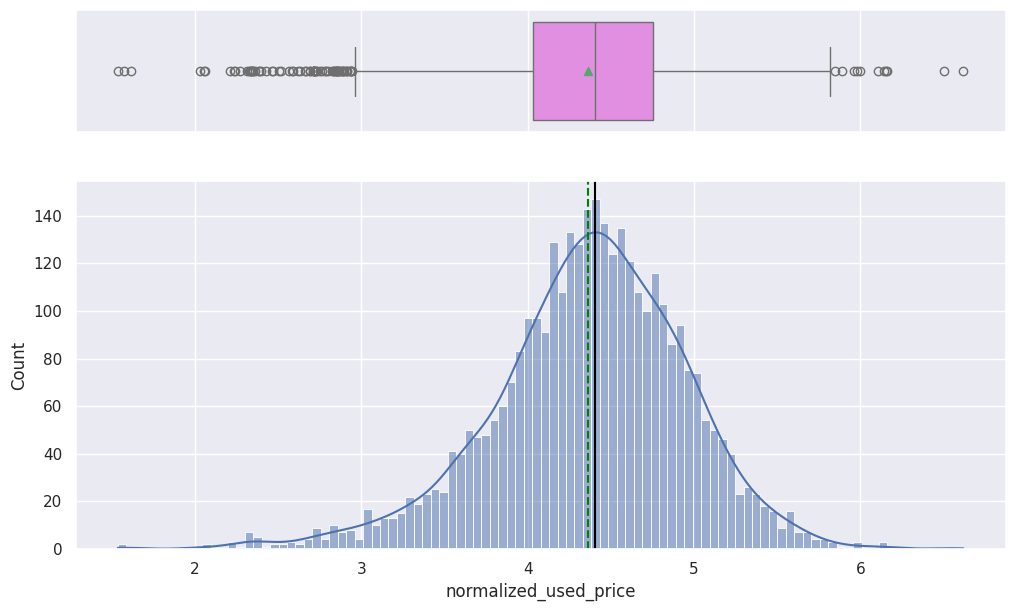

In [275]:
histogram_boxplot(df, "normalized_used_price", kde=True, bins=100)
#print(Fore.RED + f" skew:", skew(df.normalized_used_price, bias=False).round(4))
skewed_value(df.normalized_used_price)


Observations:

- The mean and mean of used price has only slight difference and the skewness is -0.53. Since the skewness is between-1 and -0.5 , the data are moderately skewed and since it is negative it is left skewed
- Mean used price is around 4.4 euros.

**`normalized_new_price`**

 skew: -0.077


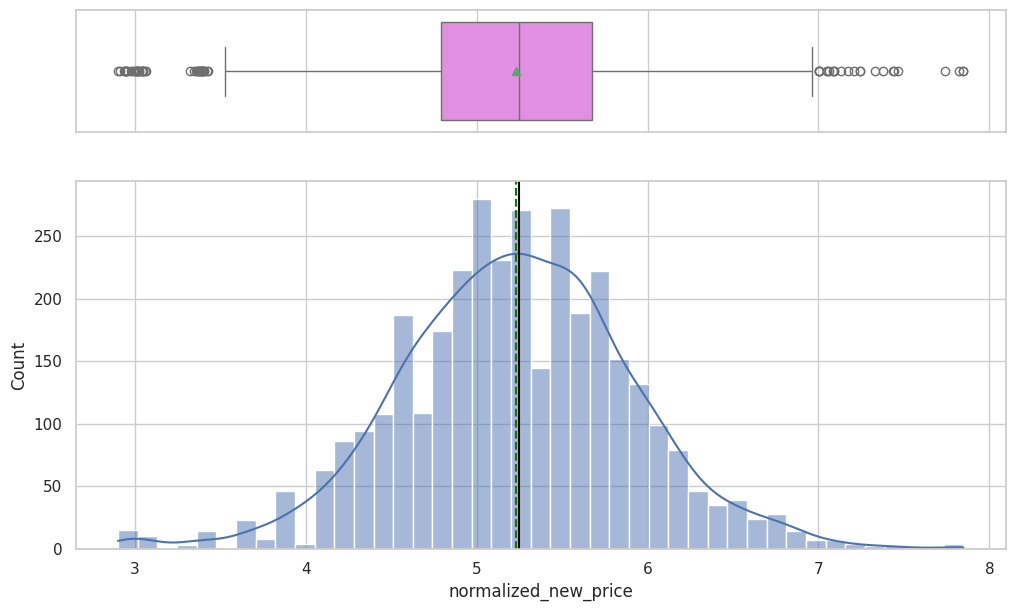

In [276]:
histogram_boxplot(df, "normalized_new_price", kde=True)

skewed_value(df.normalized_new_price)

Observations:

- The average and the mean new price almost same, indicating normal distribution.
- The skewness is -0.07 .Since the skewness is between -0.5 and 0.5 , it is fairly symmetrical
- There are outliers outside lower and upper limit of the box plot

**`screen_size`**

 skew: 1.0239


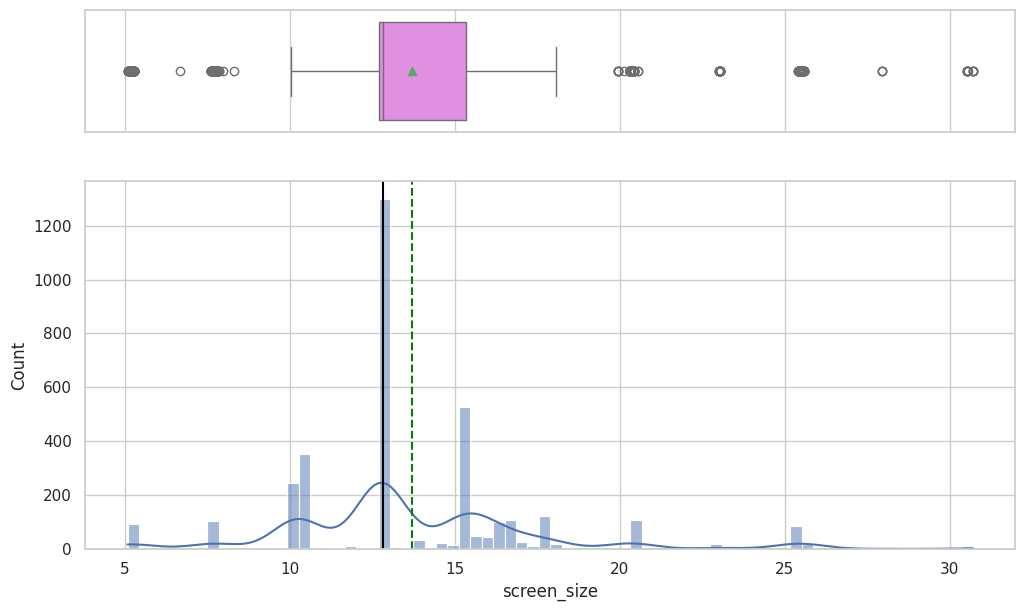

In [277]:
histogram_boxplot(
    df, "screen_size", kde=True
)  ## Complete the code to create histogram_boxplot for 'screen_size'
skewed_value(df.screen_size)

Observations:

- The average and the mean screen size are different, indicating not a normal distribution.
- The skewness is 1.02 .Since the skewness greater than 1 , data is highly right skewed
- There are outliers outside lower and upper limit of the box plot and distributed outliers when the screen size is after 15 cms
- Around 50% of the devices have a screen larger than 13cm.

**`main_camera_mp`**

 skew: 0.7655


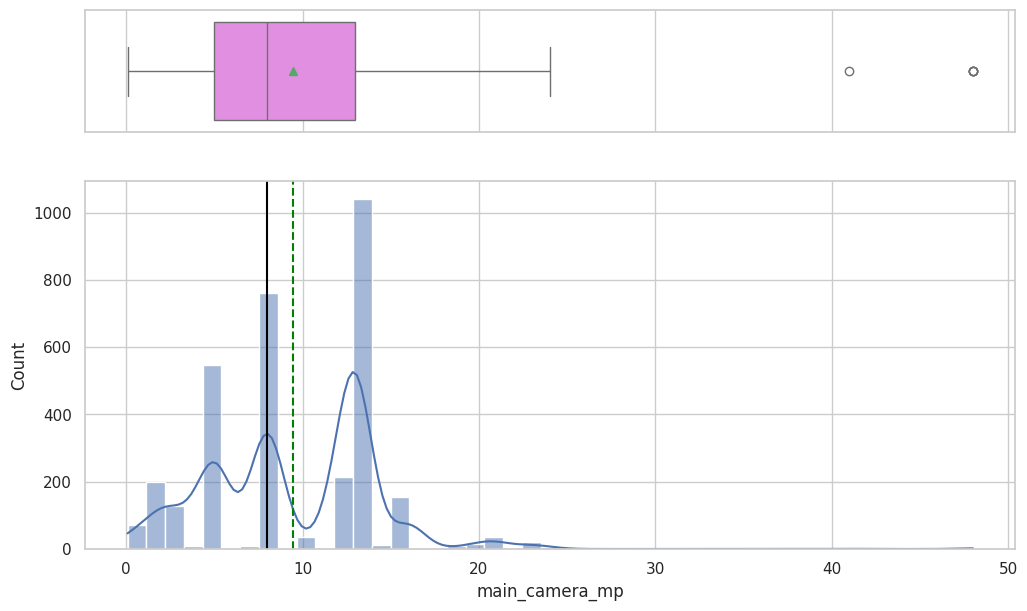

In [278]:
histogram_boxplot(df, "main_camera_mp", kde=True)
skewed_value(df[~df.main_camera_mp.isna()].main_camera_mp)

**Observations:**

- The average and the mean main camera mpg are different, indicating not a normal distribution. The skewness is 0.7 with out null values . Since the skewness is between 0.5 and 1,data is moderately right skewed
- There are outliers outside lower and upper limit of the box plot and distributed outliers when the screen size is after 15 cms
- Few devices offer rear cameras with more than 20MP resolution.

**`selfie_camera_mp`**

 skew: 1.8016


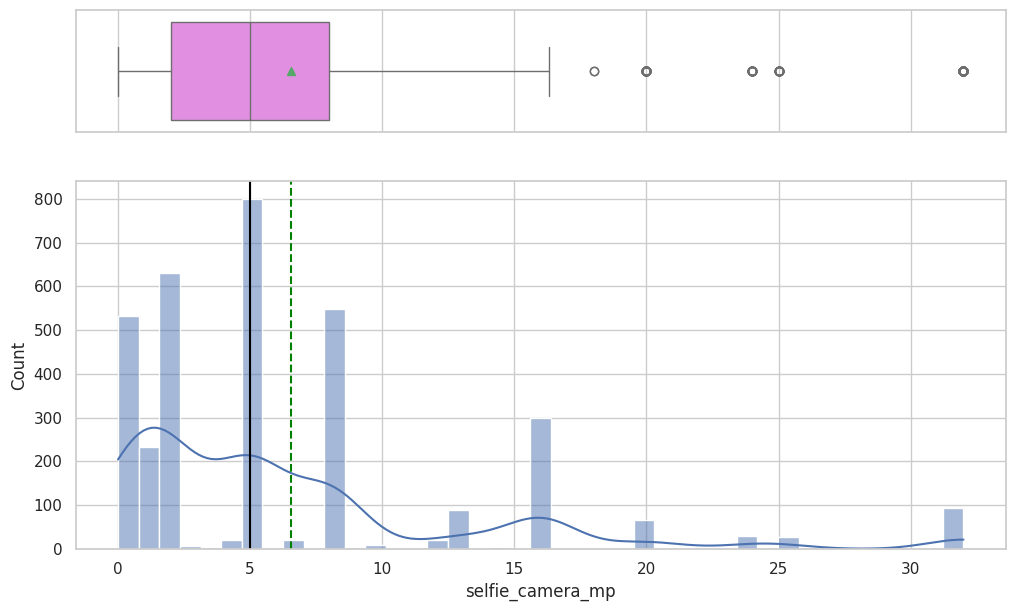

In [279]:
histogram_boxplot(df, "selfie_camera_mp", kde=True)
skewed_value(df[~df.selfie_camera_mp.isna()].selfie_camera_mp)

- Some devices do not provide a front camera (most likely the feature phones), while few devices offer ones with more than 16MP resolution.

**`int_memory`**

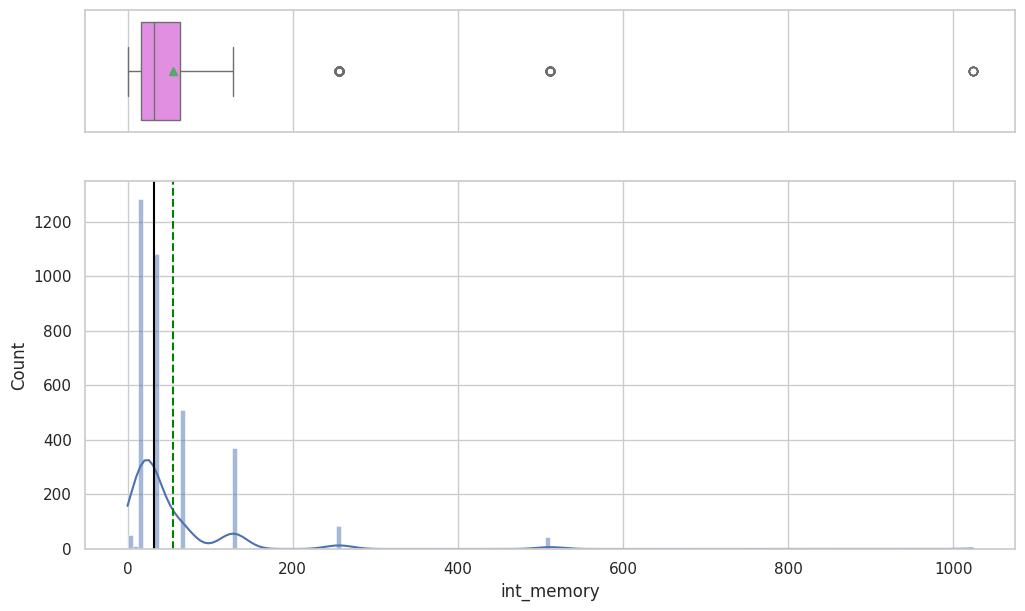

In [280]:
histogram_boxplot(df, "int_memory", kde=True)

- Few devices offer more than 256GB internal memory.

**`ram`**


 skew: 1.0692


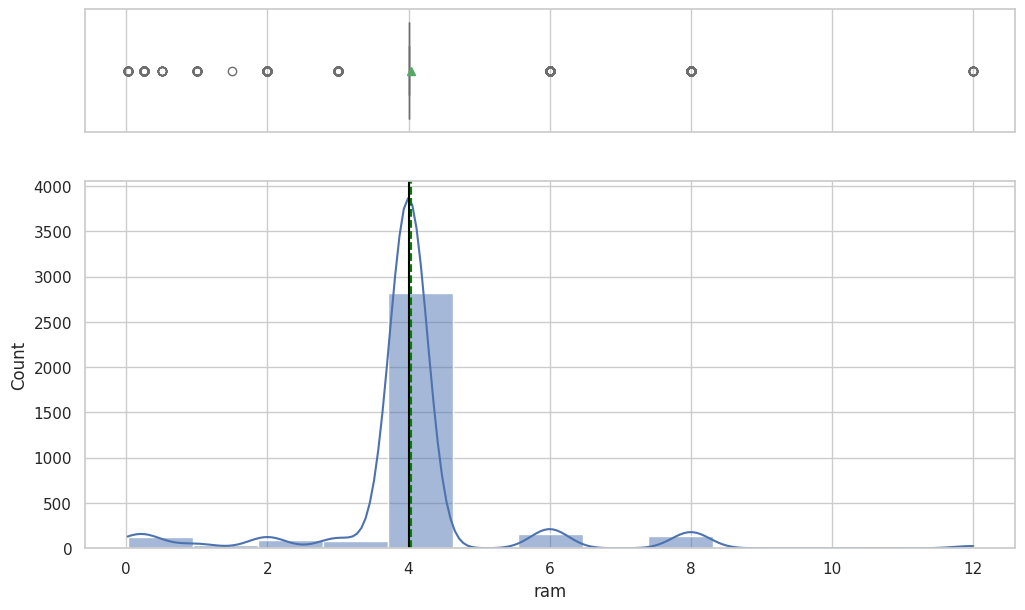

In [281]:
histogram_boxplot(df, "ram", kde=True)
skewed_value(df[~df.ram.isna()].ram)

**Observations**

- The distribution of ram is heavily skewed to the right.Most of the devices offer 4GB RAM and very few offer greater than 8GB RAM
- The outliers to the right indicate that many used phone have a very high ram , 4GB or more ram.


**`weight`**

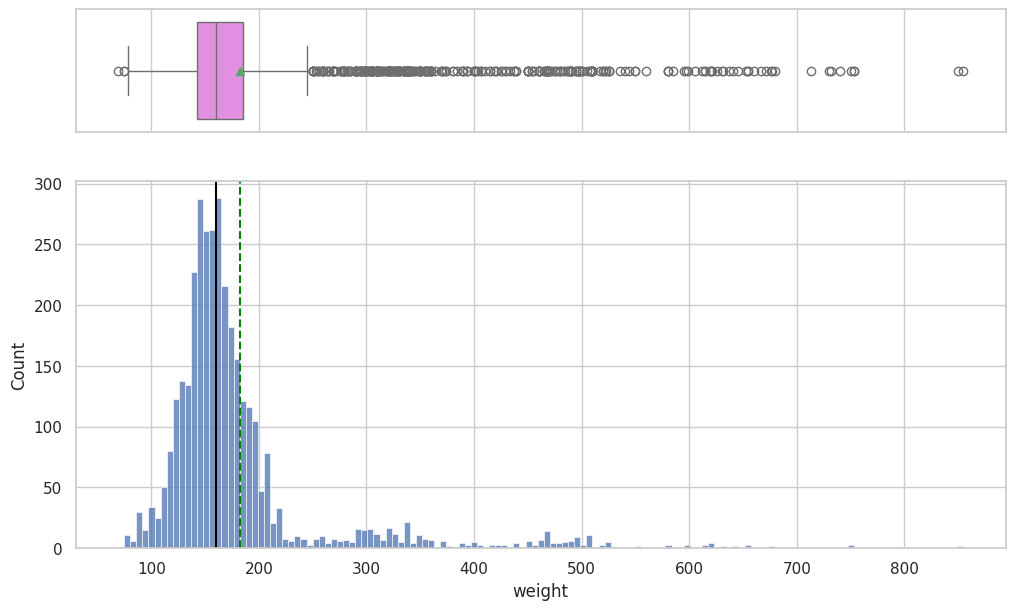

In [282]:
histogram_boxplot(df, "weight")

- The distribution of weight is right-skewed and has many upper outliers.
- Most of the phone weight isunder 250 grams. There are phones with weight more than 500 grams
- The outliers to the right indicate that many used phone weight more than 250 grams

**`battery`**

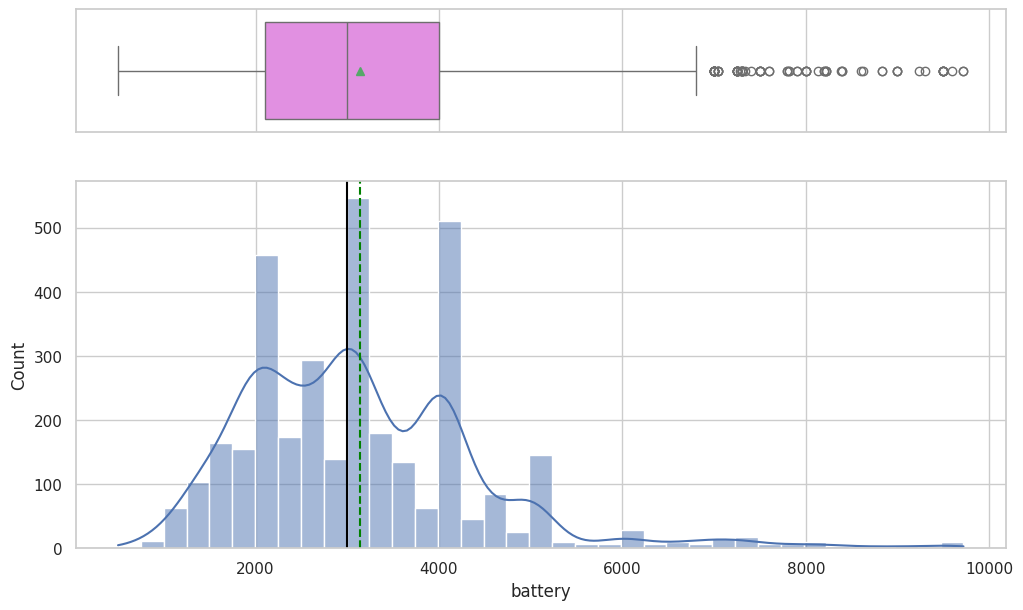

In [283]:
histogram_boxplot(df, "battery", kde=True)

- The distribution of energy capacity of battery is close to normally distributed with a few upper outliers.
- The distribution of 'battery' is heavily skewed to the right.Most of the battery used in the phone is around 6000 mAh
- The outliers to the right indicate that many used phone have a very high energy capacity more than 6000 mAh

**`days_used`**

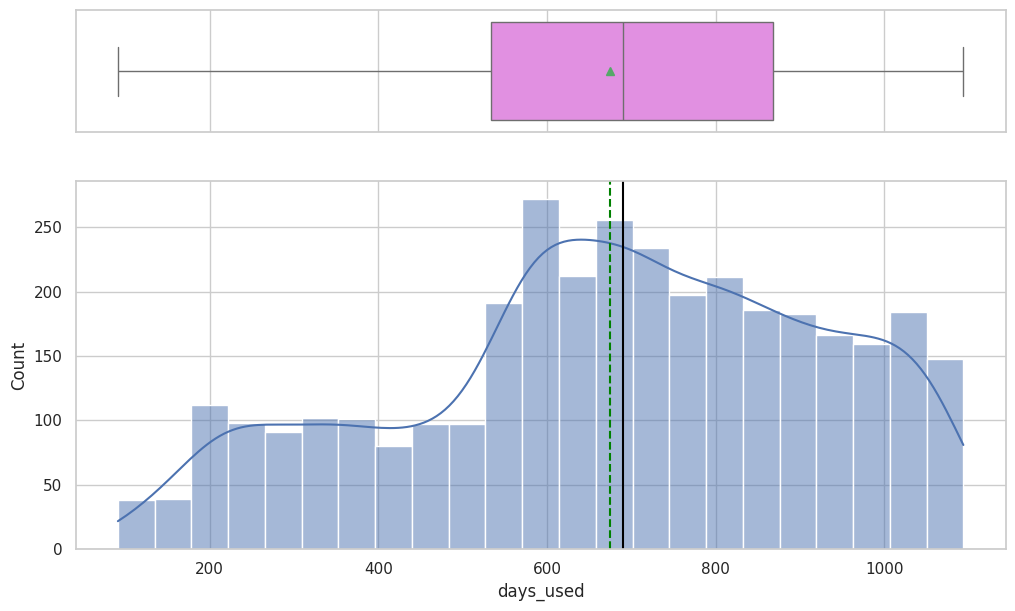

In [284]:
histogram_boxplot(df, "days_used", kde=True)

- Around 50% of the devices in the data have been used for more than 700 days.

**`brand_name`**

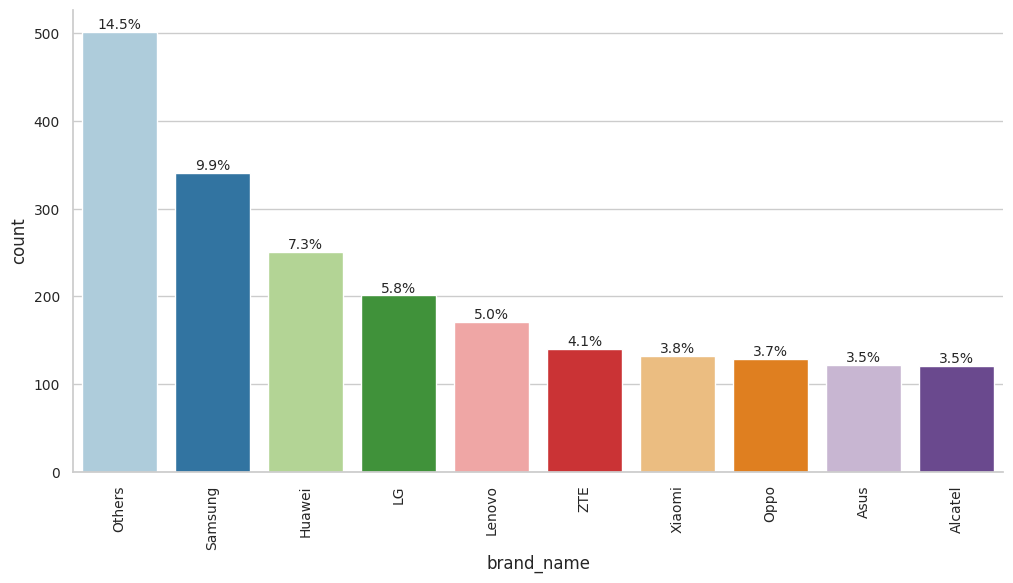

In [285]:
labeled_barplot(df, "brand_name", perc=True, n=10)


**Observations**

- Samsung has the most number of devices in the data, followed by Huawei and LG.
- 14.5% of the devices in the data are from brands other than the listed ones.

**`os`**

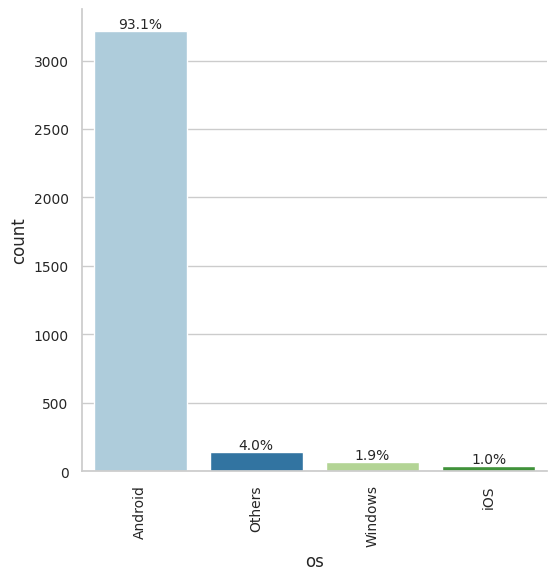

In [286]:
labeled_barplot(df, "os", perc=True)


- Android devices dominate ~93% of the used device market.

**`4g`**

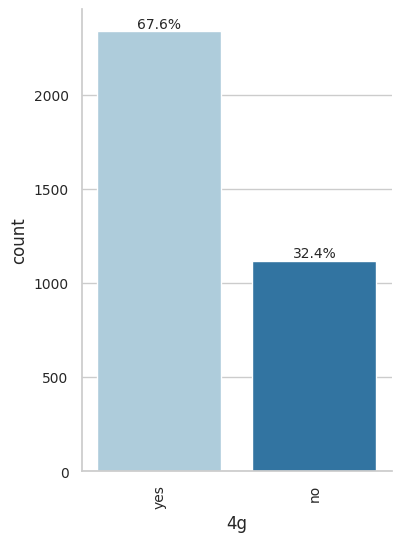

In [287]:
labeled_barplot(df, "4g", perc=True)

- Nearly two-thirds of the devices in this data have 4G available.

**`5g`**

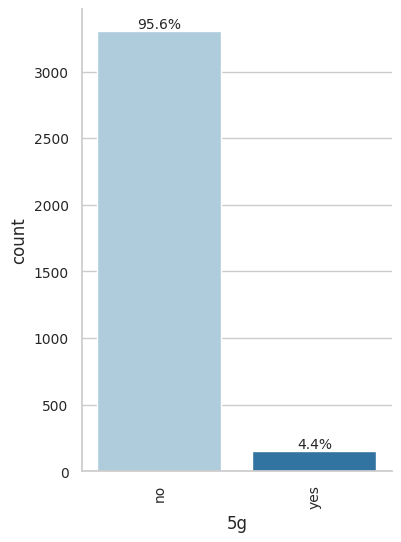

In [288]:
labeled_barplot(df, "5g", perc=True)

- Around 50% of the devices in the data were originally released in 2015 or before.

- Only a handful of devices in this data provide 5G network.

**`release_year`**

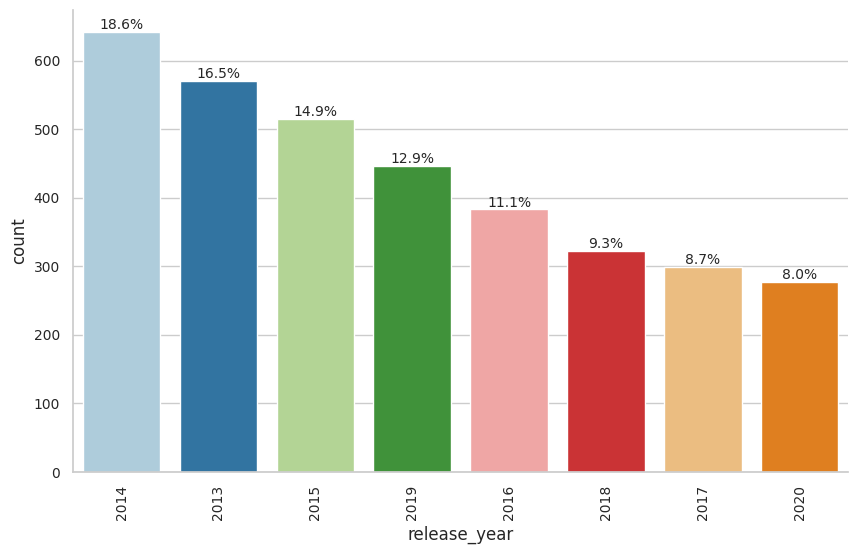

In [289]:
labeled_barplot(df, "release_year", perc=True)

### Bivariate Analysis

**Correlation Check**

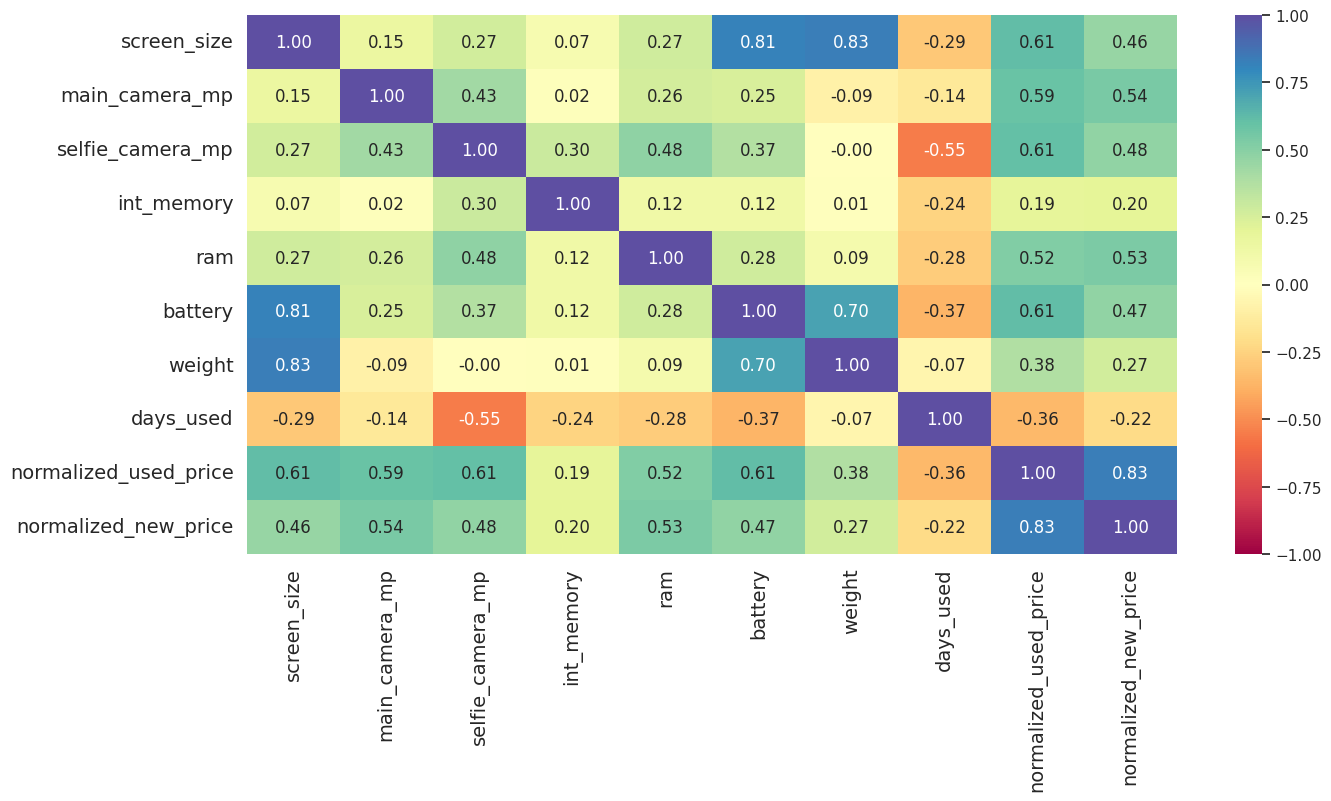

In [290]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.tick_params(labelsize=14)
plt.show()

**Observations**

- normalized used price is highly negatively correlated with days_used , which means that as days used increases, normalized used price tends to decrease.
- normalized used price is highly positively correlated with screen_size , main_camera_mp,selfie_camera_mpg and ram,battery which means that as more screen size , camera memory , ram and battery capacity increases the used price increases.
- battery and screen size is highly correlated.
- Weight of the phone and screen size are highly correlated.
- normalized used price and normalized new price are highly correlated.
- battery and weight are highly correlated.
-selfie_camera and days used are negatively correlated

 - The normalized used device price is highly correlated with the normalized price of a new device model.
    - This makes sense as the price of a new model is likely to affect the used device price.
- The normalized used device price is also moderately correlated with the resolution of the cameras provided, the size of the screen, and the battery capacity.
- Weight, screen size, and battery capacity of a device show a good amount of correlation.
    - This makes sense as larger battery capacity requires bigger space, thereby increasing screen size and weight.
- The number of days a device is used is negatively correlated with the resolution of its front camera.
    - This makes sense as older devices did not offer as powerful front cameras as the recent ones.

Let's check the variation in used price with some of the categorical columns in our data

Brand Name vs Used Price

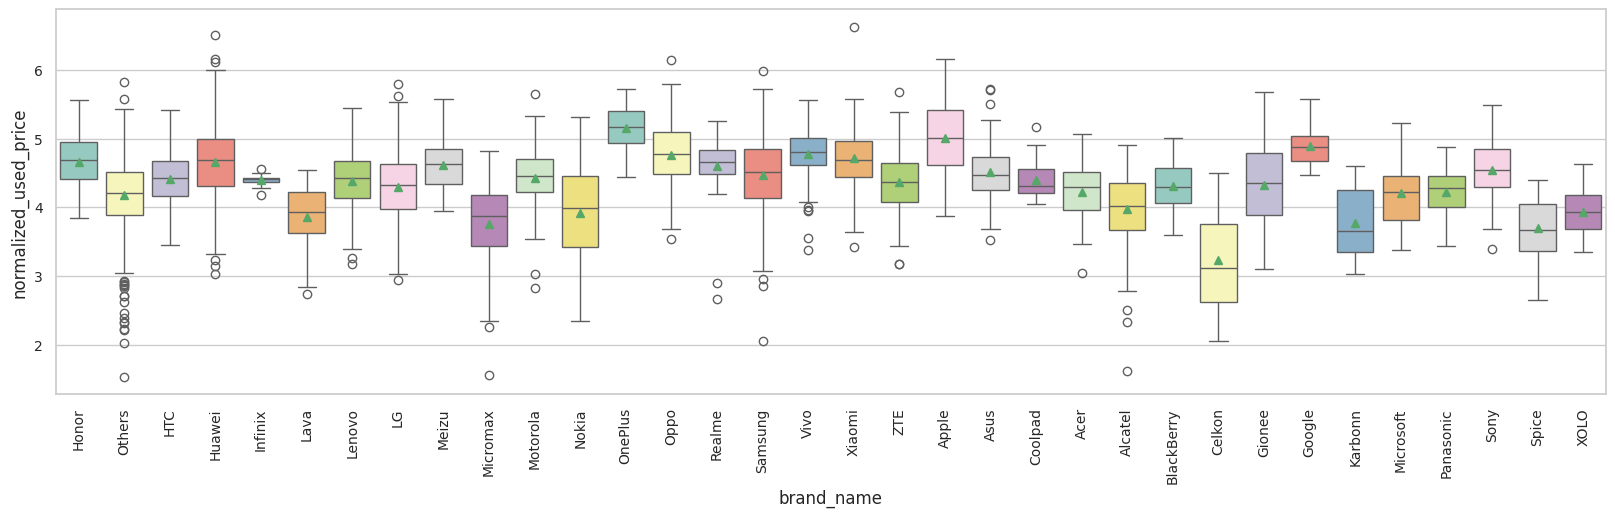

In [291]:
plt.figure(figsize=(20, 5))
sns.boxplot(x="brand_name", y="normalized_used_price", data=df, showmeans=True, palette="Set3")
plt.xticks(rotation=90)
plt.tick_params(labelsize=10)
plt.show()

**Observations**

- The used price is low for Celkon brand and high for Apple brand
- The brand names Others,Micromax,Alcatel has the lowest normalized used price with lowest values in ouliers
- There are few brands with no outliers (Honor,HTC,Meizu,OnePlus,Nokia,Nokia,BlackBerry,Celkon etc)
- Infinix brand name has very less phonesd and it is not much distributed.
- With out outlier the brand name Apple has the highest normalized used price

**The amount of RAM is important for the smooth functioning of a device. Let's see how the amount of RAM varies across brands.**

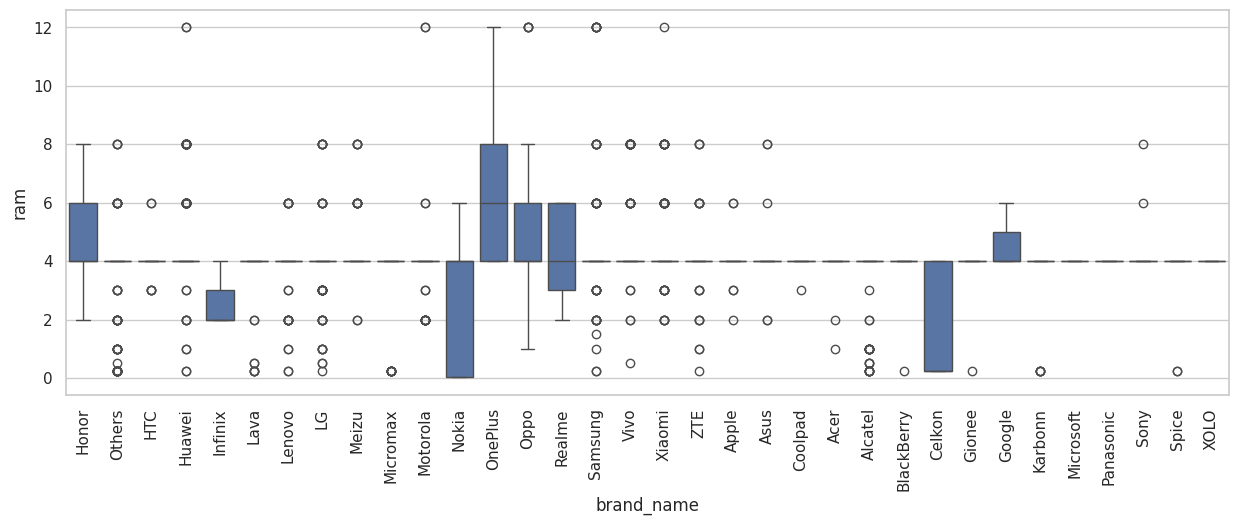

In [292]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

**Observations**

- 50% of the devices offered by most of the companies have 4GB of RAM.
- 50% of OnePlus devices have 6GB or more RAM, indicating that OnePlus devices offer more RAM in general.

**People who travel frequently require devices with large batteries to run through the day. But large battery often increases weight, making it feel uncomfortable in the hands. Let's create a new dataframe of only those devices which offer a large battery and analyze.**

In [293]:
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 15)

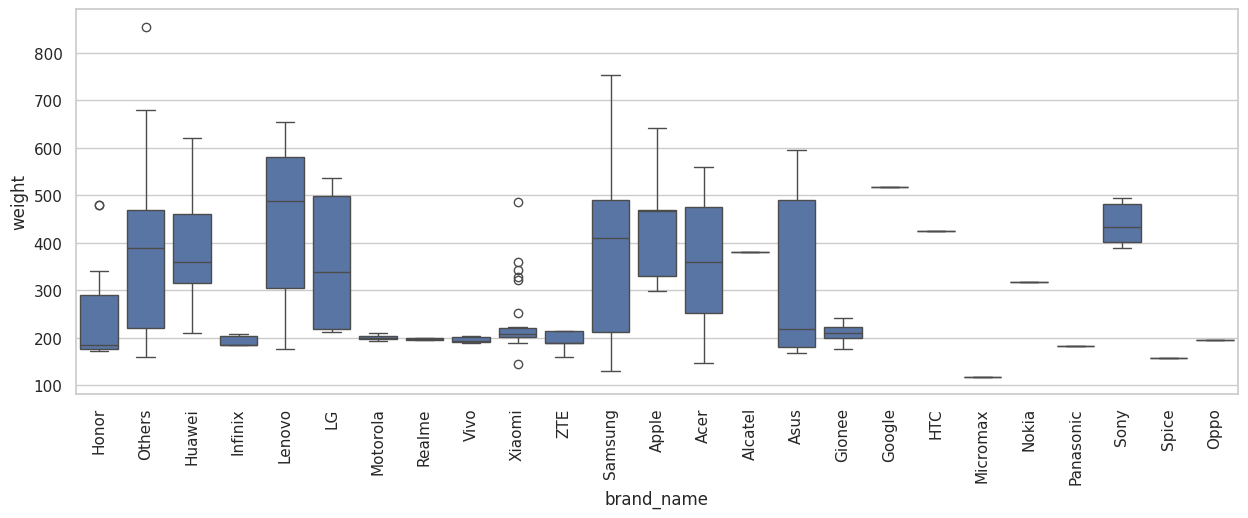

In [294]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df_large_battery, x="brand_name", y="weight")
plt.xticks(rotation=90)
plt.show()

**Observations**

- A lot of brands offer devices which are not very heavy but have a large battery capacity.
- Some devices offered by brands like Vivo, Realme, Motorola, etc. weigh just about 200g but offer great batteries.
- Some devices offered by brands like Huawei, Apple, Sony, etc. offer great batteries but are heavier.

**People who buy phones and tablets primarily for entertainment purposes prefer a large screen as they offer a better viewing experience. Let's create a new dataframe of only those devices which are suitable for such people and analyze.**

In [295]:
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 15)

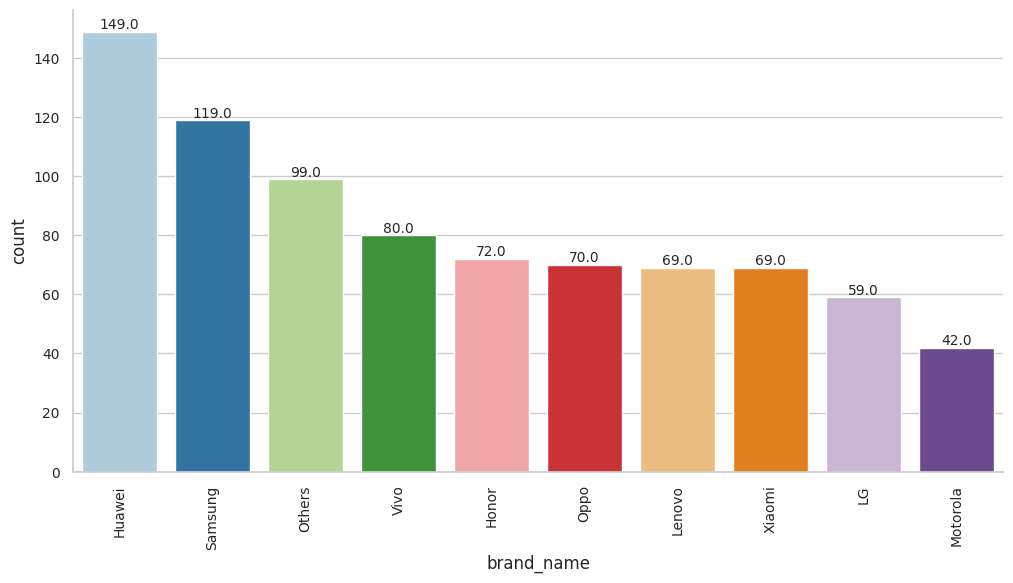

In [296]:
labeled_barplot(df_large_screen, "brand_name", n=10)

**Observations**

- Huawei and Samsung offer a lot of devices suitable for customers buying phones and tablets for entertainment purposes.

**Everyone likes a good camera to capture their favorite moments with loved ones. Some customers specifically look for good front cameras to click cool selfies. Let's create a new dataframe of only those devices which are suitable for this customer segment and analyze.**

In [297]:
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

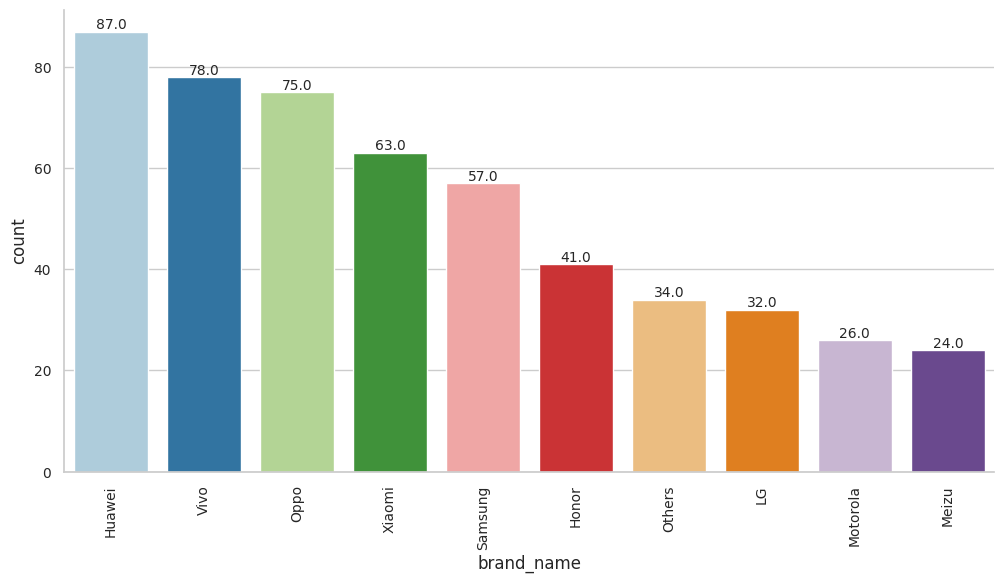

In [298]:
labeled_barplot(df_selfie_camera, "brand_name", n=10)

**Let's do a similar analysis for rear cameras.**

- Rear cameras generally have a better resolution than front cameras, so we set the threshold higher for them at 16MP.

**Observations**

- Huawei is the go-to brand for this customer segment as they offer many devices with powerful front cameras.
- Oppo and Vivo also offer a lot of devices suitable for this customer segment.

In [299]:
df_main_camera = df[df.main_camera_mp > 16]
df_main_camera.shape

(94, 15)

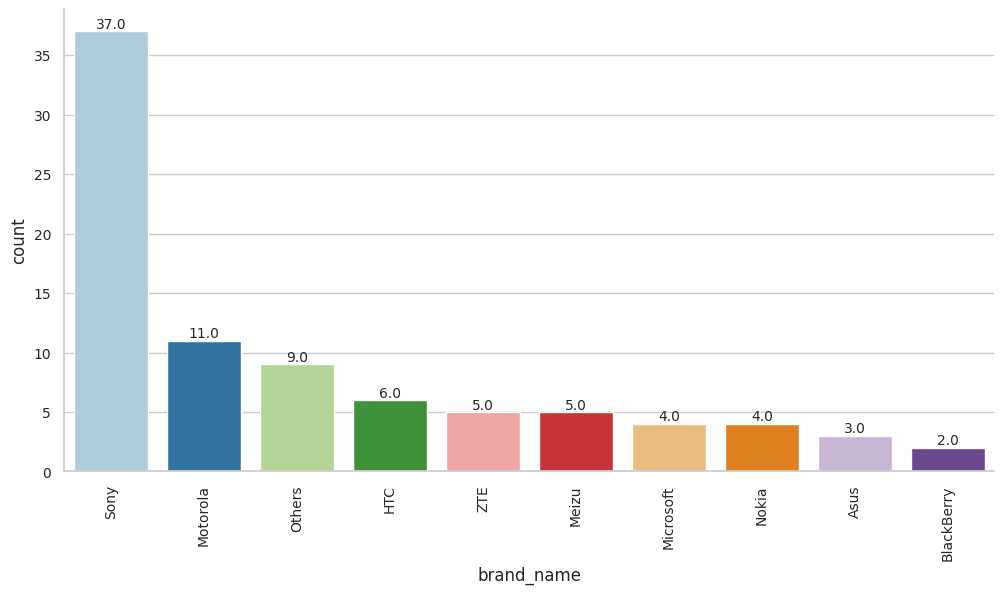

In [300]:
labeled_barplot(df_main_camera, "brand_name", n=10)

**Observations**

- Sony is the go-to brand for great rear cameras as they offer many devices under this criteria.

A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

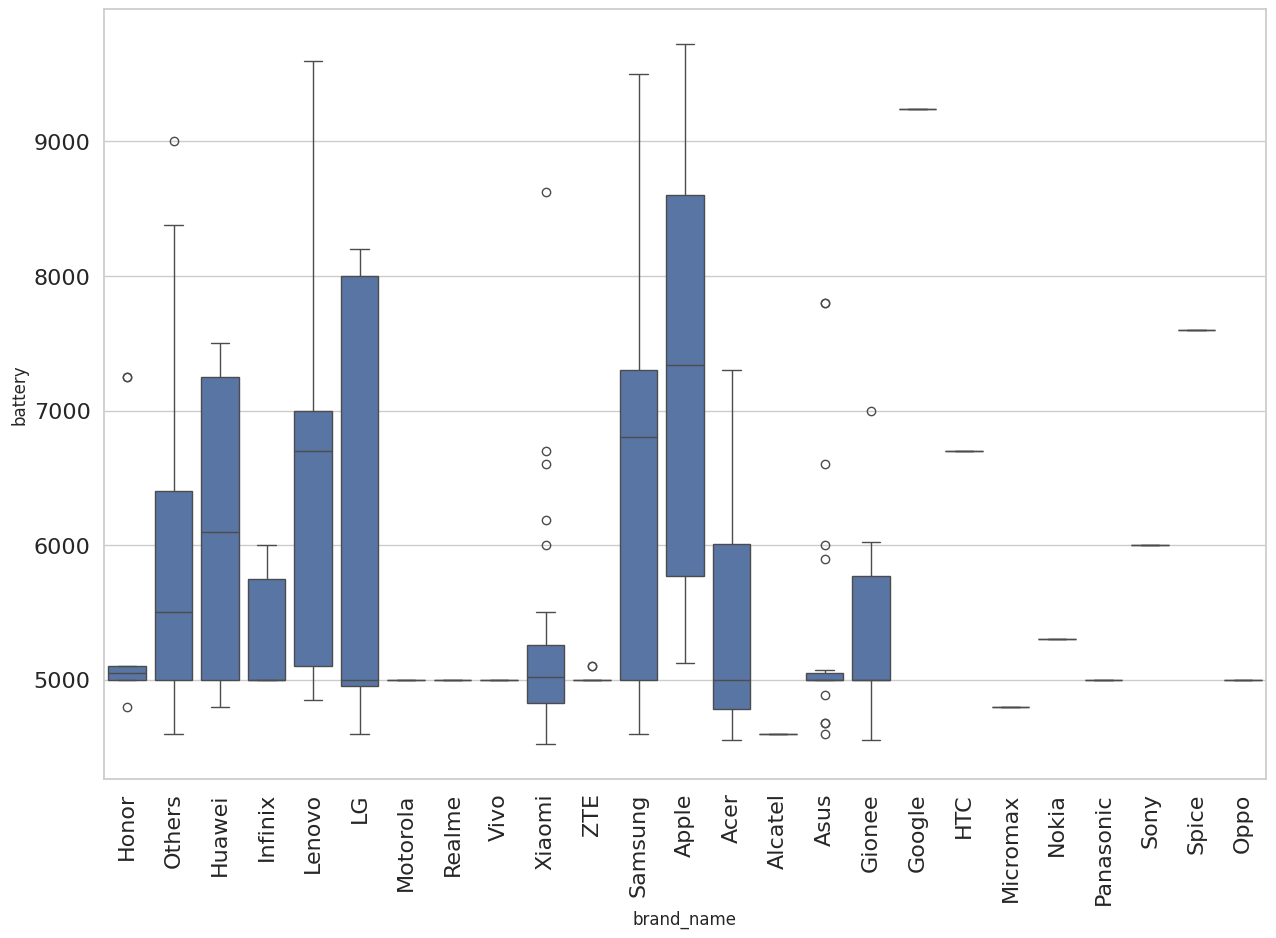

In [301]:
df_large_battery = df[df.battery > 4500]
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_large_battery, x="brand_name", y="battery")
plt.xticks(rotation=90)
plt.tick_params(labelsize=16)
plt.show()


**Observations**

- Apple has the highest battery capacity and Xiomi and others brand has the lowest battery capacity from more than 4500mAh

**Let's see how the price of used devices varies across the years.**

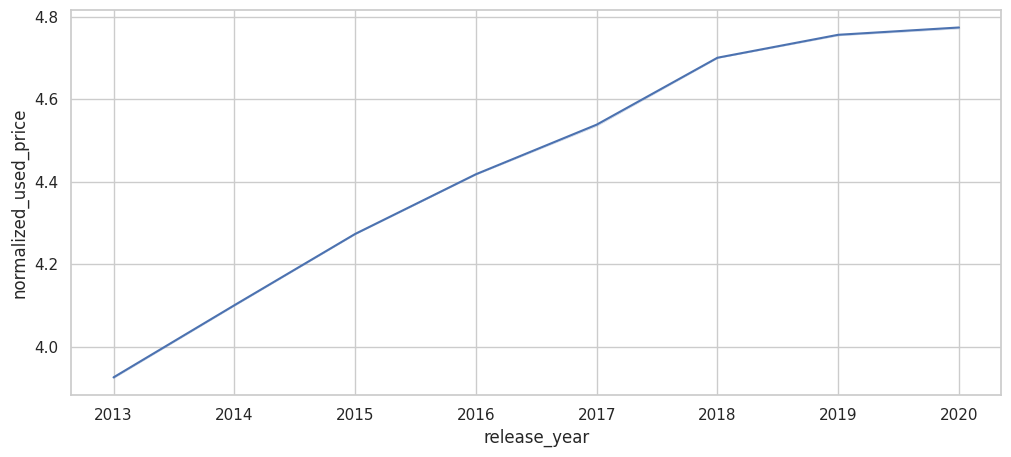

In [302]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df, x="release_year", y="normalized_used_price", ci=False)
plt.show()

- The price of used devices has increased over the years.

**Let's check how the prices vary for used phones and tablets offering 4G and 5G networks.**

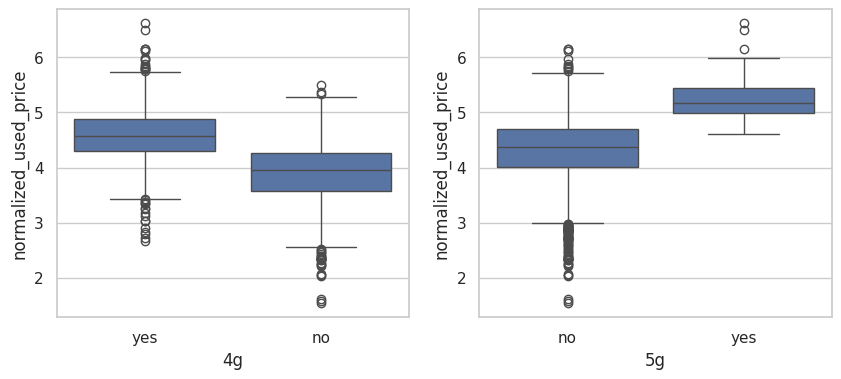

In [303]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price")

plt.show()

**Observations**

- As expected, used devices offering 4G and 5G networks are generally priced higher than the ones without 4G and 5G networks.

In [304]:
df.select_dtypes(include=np.number).columns.tolist()

['screen_size',
 'main_camera_mp',
 'selfie_camera_mp',
 'int_memory',
 'ram',
 'battery',
 'weight',
 'release_year',
 'days_used',
 'normalized_used_price',
 'normalized_new_price']

**Numeric feature vs Used Price**

['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight', 'release_year', 'days_used', 'normalized_new_price']


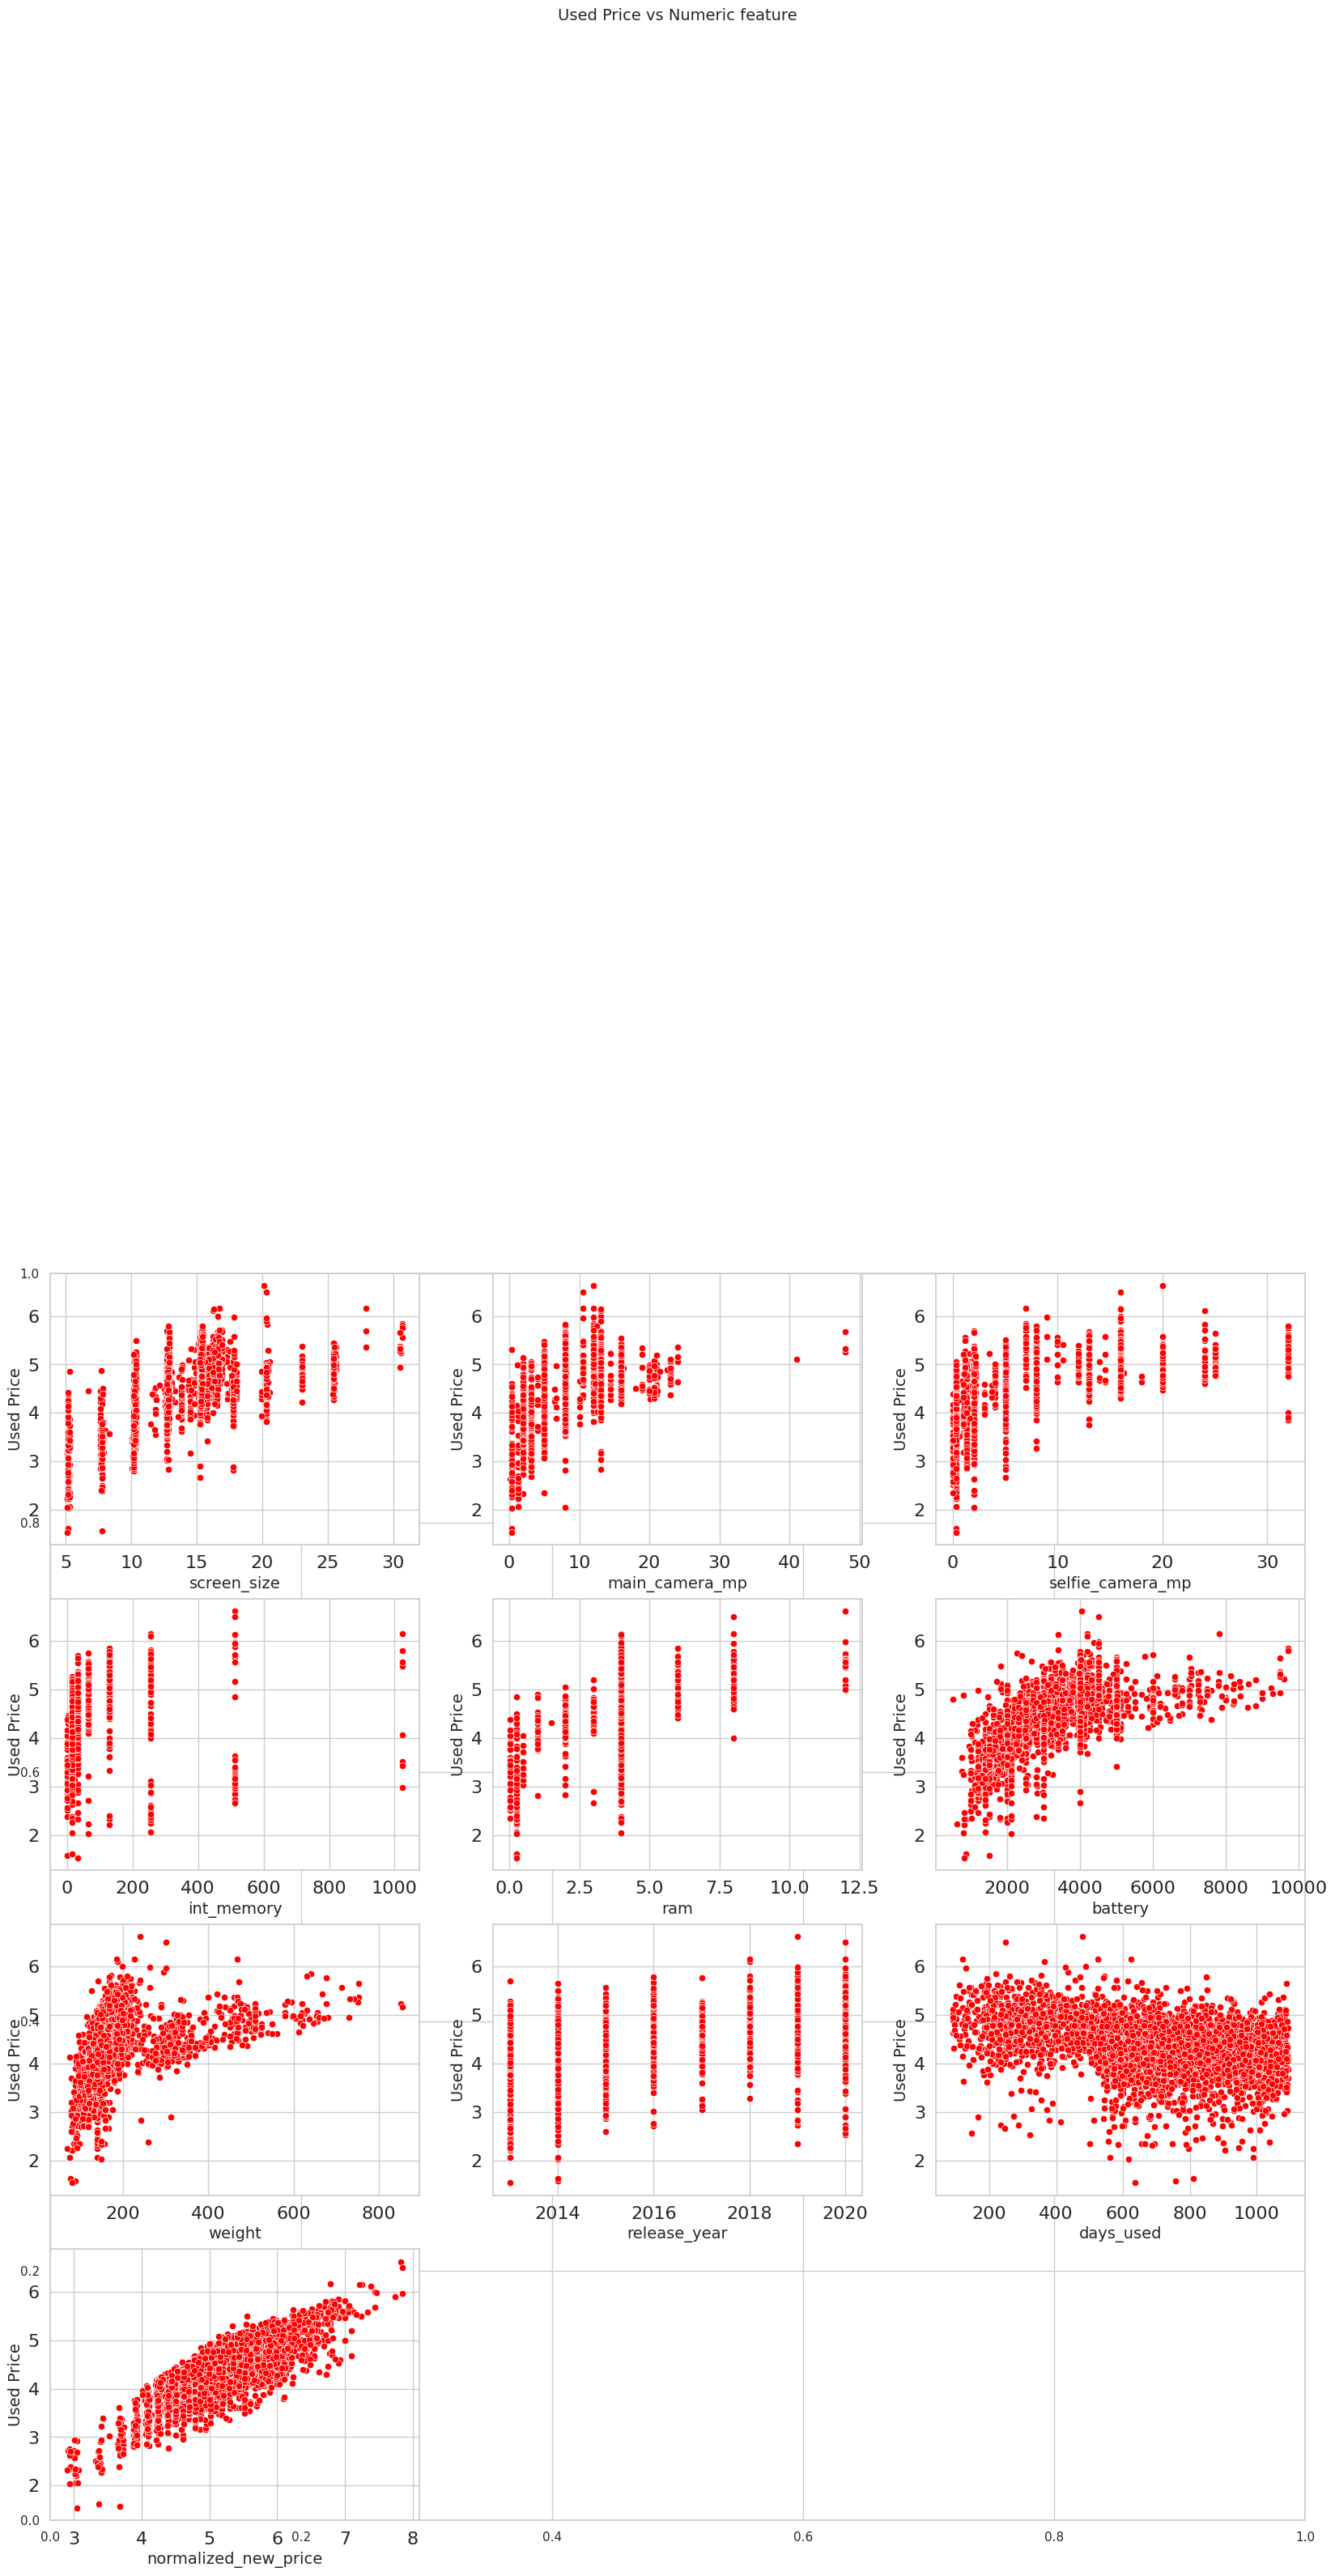

<Figure size 640x480 with 0 Axes>

In [305]:
numeric_column_scatterplot = df.select_dtypes(include=np.number).columns.tolist()
numeric_column_scatterplot.remove("normalized_used_price")
print(numeric_column_scatterplot)
plt.figure(figsize=(20, 20))
plt.title("Used Price vs Numeric feature", fontsize=14, y=2)
for i in enumerate(numeric_column_scatterplot):
    plt.subplot(4, 3, i[0] + 1)
    sns.scatterplot(data=df, x=i[1], y="normalized_used_price",color="red")
    plt.xlabel(i[1], fontsize=14)
    plt.ylabel("Used Price", fontsize=14)
    plt.tick_params(labelsize=16)

plt.show()
plt.tight_layout()

**Observations:**

**Used Price vs New Price**

- The used price and new price is highly correlated and has a positive correlation. For higher new price the used price is also higher

**Used Price vs Days used**

- If the days used is less then the used price is little more

**Used Price vs Release Year**

- The 2019 and 2020 release year phone has the highest normalized used price.
- The 2013 and 2014 model has the starting lowest normalized used price

**Used Price vs Weight**

- When the weight of the phone increases the normalized used price also increases

**Used Price vs Battery**

- When the battery capacity increases the normalized used price also increases

**Used Price vs ram**

-Most of the used phone is 4 GB Ram . The normalized used price of the 12 GB ram phone starts at 5 and ends at 7 euros normalized price.

**Used Price vs Main camera resolution**

-The used price is more when main camera resolution is around 10 to 20 megapixels
- Most of the main camera resolution is under 25 mega pixel. Very few phone has only main camera resolution greater than ~25 megapixels

**Used Price vs Selfie camera resolution**

- The normalized used price is more for selfie camera resolution between 15 and 20 megapixels
- Most of the selfie camera resolution is with in 10 megapixel

**Used Price vs Internal memory**

- The normalized used price is more on internal memory around 500 GB. There are lots of phone with internal memory less than 200 GB.

**Used Price vs Screen size**

- When screen size increases normalized unit price also increases with a few exception in screen size 20 cms

**Brand name and the operating system each brand uses**

<Figure size 1500x700 with 0 Axes>

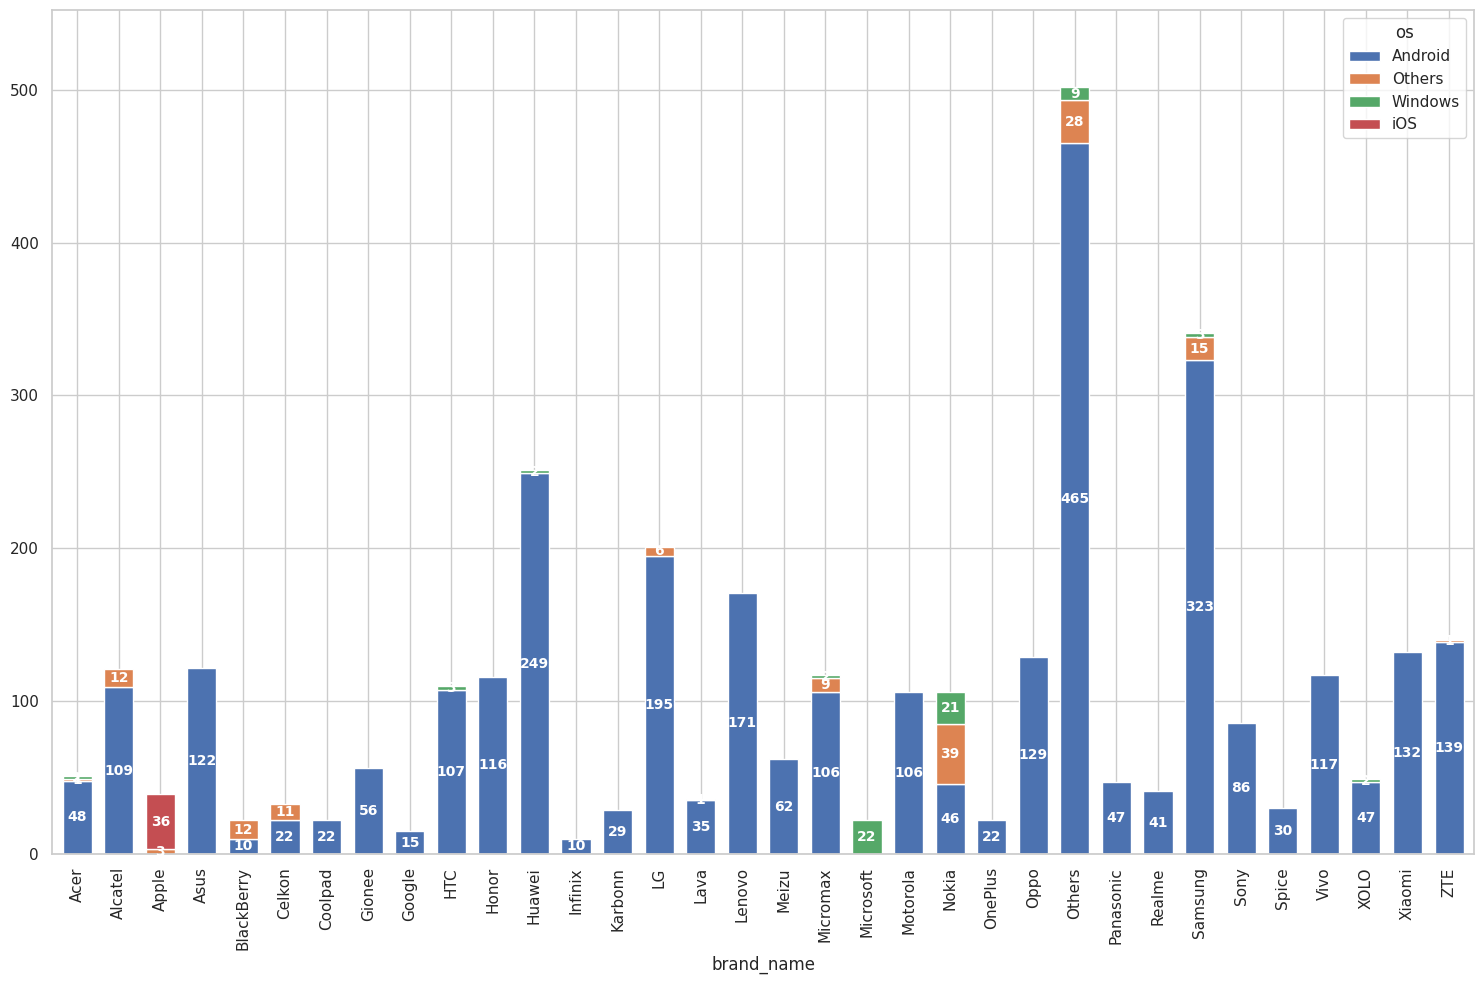

In [306]:
colors = ("#CD7F32", "silver", "gold","green")
plt.figure(figsize=(15,7))
sns.set_style('whitegrid')
ax=pd.crosstab(df["brand_name"],df["os"]).plot(kind="bar",stacked=True,figsize=(15, 10),width=.7)
#y_offset = 15

#for c in ax.containers:
 #   ax.bar_label(c, label_type='center')
# annotate the top containers with the cumulative sum
#ax.bar_label(ax.containers[2], padding=3)


# pad the spacing between the number and the edge of the figure
ax.margins(y=0.1)

for i, rect in enumerate(ax.patches):
    # Find where everything is located
    height = rect.get_height()
    width = rect.get_width()
    x = rect.get_x()
    y = rect.get_y()

    # The height of the bar is the count value and can used as the label
    label_text = f'{height:.0f}'

    label_x = x + width / 2
    label_y = y + height / 2

    # don't include label if it's equivalently 0
    if height > 0.001:
        ax.text(label_x, label_y, label_text, ha='center', va='center', fontsize=10, weight='bold',color='w')

plt.tight_layout()

**Observations**

- This shows the different types of operating system used by each brand and their counts
- Alacatel,Blackberry,Celkon brand uses android and others Operating system
- Apple brand uses ios and others os
- Nokia uses android, windows and others operating system
- Microsoft brand uses only windows operating system

**Variable Transformation**

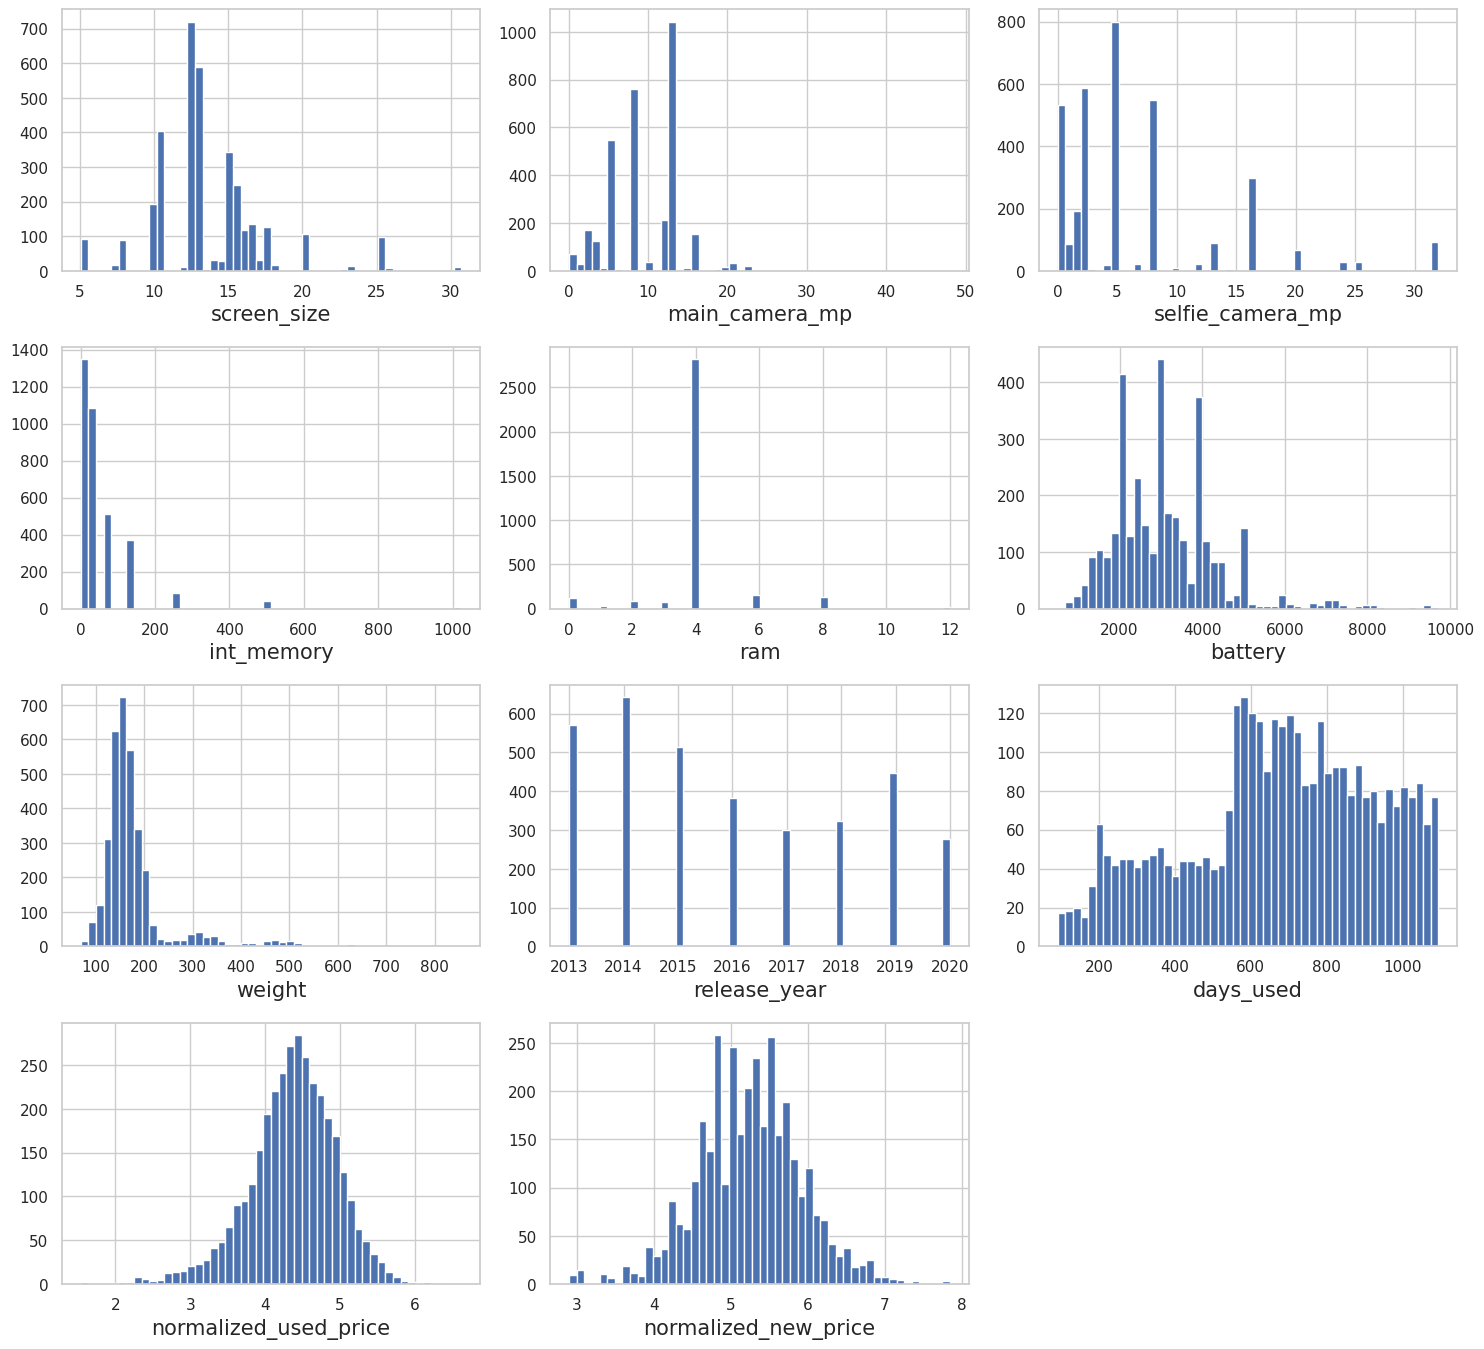

In [307]:
dflogTransformation = df.copy()
numeric_columns = dflogTransformation.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(15, 30))
for i in range(len(numeric_columns)):
    plt.subplot(9, 3, i + 1)
    plt.hist(dflogTransformation[numeric_columns[i]], bins=50)
    plt.tight_layout()
    plt.xlabel(numeric_columns[i], fontsize=15)

plt.show()

**Observations**

- Most of the columns are very high skewed distribution
- We will apply the log transformation to weights feature

### **Log transformation on Weight column**

In [308]:
numeric_Weight_column = ["weight"]
# applying log transformation
for col in numeric_Weight_column:
    dflogTransformation[col + "_log"] = np.log(dflogTransformation[col] + 1)

# dropping original columns
dflogTransformation.drop(numeric_Weight_column, axis=1, inplace=True)
dflogTransformation.head()  # delete this line

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,release_year,days_used,normalized_used_price,normalized_new_price,weight_log
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,2020,127,4.307572,4.715100,4.990433
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,2020,325,5.162097,5.519018,5.365976
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,2020,162,5.111084,5.884631,5.365976
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,2020,345,5.135387,5.630961,6.175867
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,2020,293,4.389995,4.947837,5.225747


Let's check the skewness after applying the log transformation

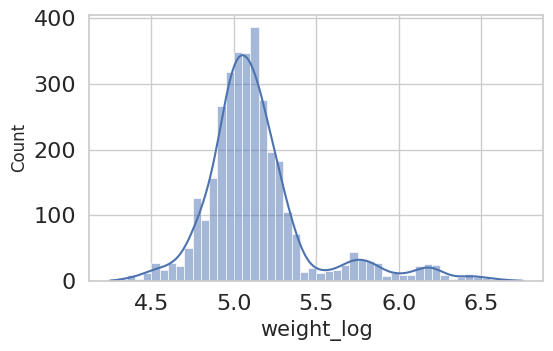

In [309]:
new_dist_cols = [item + "_log" for item in numeric_Weight_column]
plt.figure(figsize=(15, 30))
for i in range(len(new_dist_cols)):
    plt.subplot(9, 3, i + 1)
    sns.histplot(dflogTransformation[new_dist_cols[i]], bins=50, kde=True)
    plt.tight_layout()
    plt.xlabel(new_dist_cols[i], fontsize=15)
plt.tick_params(labelsize=16)
plt.show()

**Observations**

- The weight column is still skewed , but not as heavily as before

### Heat map after weight log transformation

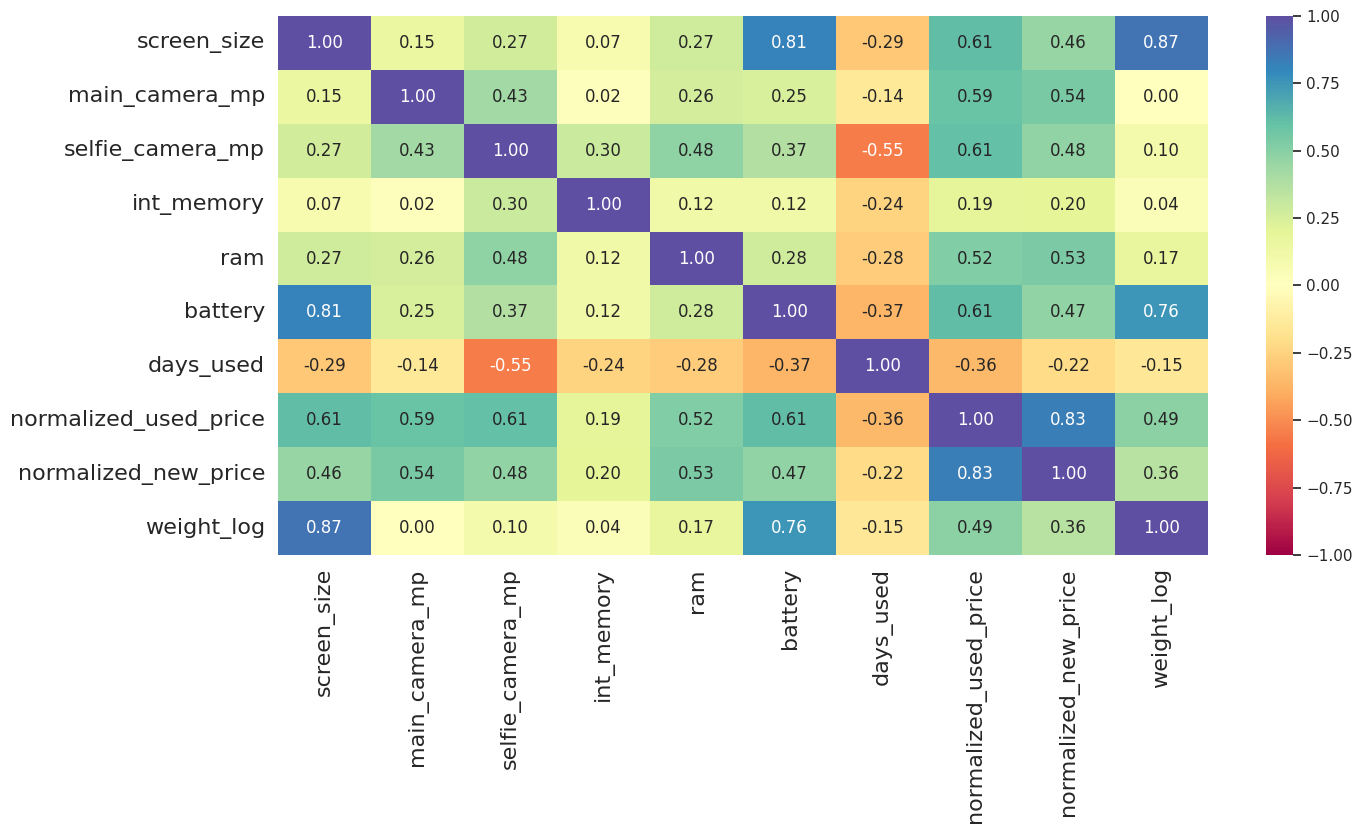

In [310]:
# new_dist_cols.append("normalized_used_price")

cols_list = dflogTransformation.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    dflogTransformation[cols_list].corr(),
    annot=True,
    vmin=-1,
    vmax=1,
    fmt=".2f",
    cmap="Spectral",
)
plt.tick_params(labelsize=16)
plt.show()

**Observations**

- normalized used price is highly negatively correlated with days_used , which means that as days used increases, normalized used price tends to decrease.

- normalized used price is highly positively correlated with screen_size , main_camera_mp,selfie_camera_mpg and ram,battery which means that as more screen size , camera memory increases the used price.

- battery and screen size is highly correlated.

- Weight of the phone and screen size are highly correlated.
- normalized used price and nornalized new price are highly correlated.
- battery and 'weight log' is highly correlated.

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing Value Imputation

- We will impute the missing values in the data by the column medians grouped by `release_year` and `brand_name`.

In [311]:
# let's create a copy of the data
df_dp = df.copy()

In [312]:
# checking for missing values
df_dp.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,4
ram,4
battery,6


In [313]:
def missingcount_percentage(dfper):
  features_with_na = [
    features
    for features in dfper.columns
    if dfper[features].isnull().sum() > 1
]
  print(Fore.RED + "Missing  feature values:", features_with_na, end="\n\n")
  if(len(features_with_na)==0):
    print(Fore.RED + "No missing value", end="\n\n")
  for feature in features_with_na:
    print(Fore.GREEN +
        ". " +  feature ,
        "has(",dfper[feature].isnull().sum(),"count missing ) and ",
        np.round(dfper[feature].isnull().mean() * 100, 2),
        "% missing values", end="\n\n"
    )



In [314]:
# checking for missing values and its percentag missing
missingcount_percentage(df_dp)

Missing  feature values: ['main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', 'weight']

. main_camera_mp has( 179 count missing ) and  5.18 % missing values

. selfie_camera_mp has( 2 count missing ) and  0.06 % missing values

. int_memory has( 4 count missing ) and  0.12 % missing values

. ram has( 4 count missing ) and  0.12 % missing values

. battery has( 6 count missing ) and  0.17 % missing values

. weight has( 7 count missing ) and  0.2 % missing values



- We will impute the missing values in the data by the column medians grouped by `release_year` and `brand_name`.

In [315]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df_dp[col] = df_dp.groupby(["release_year", "brand_name"])[col].transform(
        lambda x: x.fillna(x.median())
    )

# checking for missing values
print(df_dp.isnull().sum())

# checking for missing values and its prcentage missing
missingcount_percentage(df_dp)

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64
Missing  feature values: ['main_camera_mp', 'selfie_camera_mp', 'battery', 'weight']

. main_camera_mp has( 179 count missing ) and  5.18 % missing values

. selfie_camera_mp has( 2 count missing ) and  0.06 % missing values

. battery has( 6 count missing ) and  0.17 % missing values

. weight has( 7 count missing ) and  0.2 % missing values



- We will impute the remaining missing values in the data by the column medians grouped by `brand_name`.

In [316]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_impute:
    df_dp[col] = df_dp.groupby(["brand_name"])[col].transform(
        lambda x: x.fillna(x.median())
    )

# checking for missing values
print(df_dp.isnull().sum())

# checking for missing values and its prcentage missing
missingcount_percentage(df_dp)

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64
Missing  feature values: ['main_camera_mp']

. main_camera_mp has( 10 count missing ) and  0.29 % missing values



- We will fill the remaining missing values in the `main_camera_mp` column by the column median.

In [317]:
df_dp["main_camera_mp"] = df_dp["main_camera_mp"].fillna(df_dp["main_camera_mp"].median())

# checking for missing values
print(df_dp.isnull().sum())

# checking for missing values and its prcentage missing
missingcount_percentage(df_dp)

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64
Missing  feature values: []

No missing value



- All missing values have been imputed.

### Feature Engineering

- Let's create a new column `years_since_release` from the `release_year` column.
- We will consider the year of data collection, 2021, as the baseline.
- We will drop the `release_year` column.

In [318]:
df_dp["years_since_release"] = 2021 - df_dp["release_year"]
df_dp.drop("release_year", axis=1, inplace=True)
df_dp["years_since_release"].describe()

,years_since_release
count,3454.000000
mean,5.034742
std,2.298455
min,1.000000
25%,3.000000
50%,5.500000
75%,7.000000
max,8.000000


- 50% of the used devices in the data were originally released five and half years ago.

### Outlier Check

- Let's check for outliers in the data.

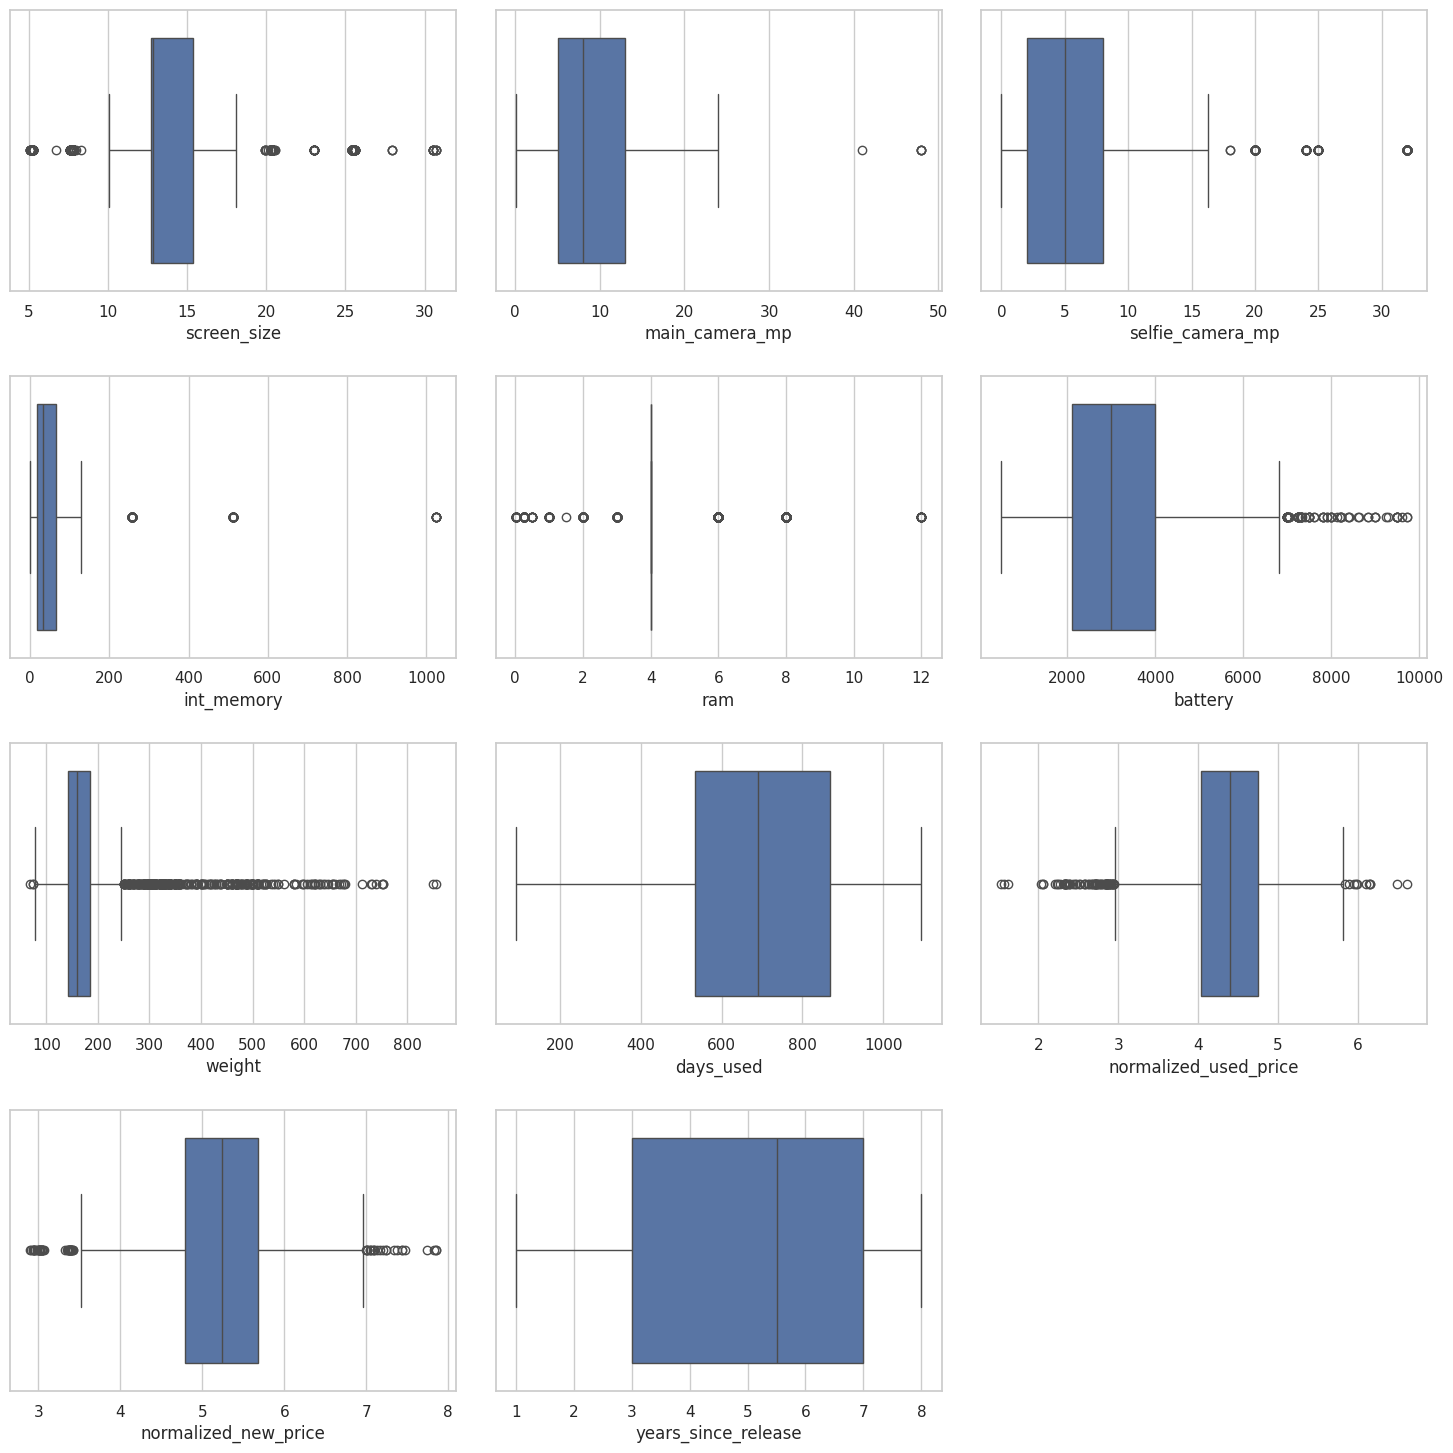

In [319]:
# outlier detection using boxplot
num_cols = df_dp.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df_dp, x=variable)
    plt.tight_layout(pad=2)

plt.show()

**Observations**

- There are quite a few outliers in the data
- However, we will not treat them as they are proper values

In [320]:
# let's check the statistical summary of the data
df_dp.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3454.0,NaN,NaN,NaN,9.617597,4.749438,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3454.0,NaN,NaN,NaN,6.555067,6.96844,0.0,2.0,5.0,8.0,32.0
int_memory,3454.0,NaN,NaN,NaN,54.528474,84.934991,0.01,16.0,32.0,64.0,1024.0
ram,3454.0,NaN,NaN,NaN,4.03262,1.368598,0.02,4.0,4.0,4.0,12.0
battery,3454.0,NaN,NaN,NaN,3132.577446,1298.884193,500.0,2100.0,3000.0,4000.0,9720.0


 **Outlier Treatment (if needed)**

In [321]:
# functions to treat outliers by flooring and capping


def treat_outliers(dfoutlier, col):
    """
    Treats outliers in a variable

    dfoutlier: dataframe
    col: dataframe column
    """
    Q1 = dfoutlier[col].quantile(0.25)  # 25th quantile
    Q3 = dfoutlier[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    dfoutlier[col] = np.clip(dfoutlier[col], Lower_Whisker, Upper_Whisker)

    return dfoutlier


def treat_outliers_all(dfoutlier, col_list):
    """
    Treat outliers in a list of variables

    df: dataframe
    col_list: list of dataframe columns
    """
    for c in col_list:
        dfoutlier = treat_outliers(dfoutlier, c)

    return dfoutlier

In [322]:
treat_out_cols = [
    "screen_size",
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "normalized_used_price",
    "normalized_new_price",
    "battery",
    "weight",
]  ## Complete the code to specify the columns for which outliers have to be treated

#dfoutliers = treat_outliers_all(df_dp, treat_out_cols)

**Observations:**

**EDA Summary after  missing value imputation and feature engineeering**

- The `screen size` ranges from 5.08 cms to 30.71 cms
- The `main camera` has a minimum resolution of 0.08 megapixels and maximum 25 megapixel from the earlier max 48 mega pixels.
- The `selfie camera` has a high of 32 megapixels resolution

- The `internal memory` of the used phone ranging from 0.010 GB to 1024 GB

- The days used indicates the latest phone avaiable is 91 days old and the oldest phone is 1094 days old

- The `brand_name` has 34 unique smartphone brands

- `os` has 4 operating systems with most of the phones are `4g` compatible and only less than 5% of the phones are `5g` compatible
- The `Others` brand name is the most occuring brand name
- The `android` is the most used operating system


### Data Preparation for modeling

- We want to predict the normalized price of used devices
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [323]:
# defining the dependent and independent variables
X = df_dp.drop(["normalized_used_price"], axis=1)
y = df_dp["normalized_used_price"]

display(X.head())

display(y.head())

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,years_since_release
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,1


,normalized_used_price
0,4.307572
1,5.162097
2,5.111084
3,5.135387
4,4.389995


In [324]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   brand_name            3454 non-null   object 
 1   os                    3454 non-null   object 
 2   screen_size           3454 non-null   float64
 3   4g                    3454 non-null   object 
 4   5g                    3454 non-null   object 
 5   main_camera_mp        3454 non-null   float64
 6   selfie_camera_mp      3454 non-null   float64
 7   int_memory            3454 non-null   float64
 8   ram                   3454 non-null   float64
 9   battery               3454 non-null   float64
 10  weight                3454 non-null   float64
 11  days_used             3454 non-null   int64  
 12  normalized_new_price  3454 non-null   float64
 13  years_since_release   3454 non-null   int64  
dtypes: float64(8), int64(2), object(4)
memory usage: 377.9+ KB


In [325]:
# let's add the intercept to data
#X = sm.add_constant(X)

In [326]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category","bool"]).columns.tolist(),
    drop_first=True,
)

X.head()

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,years_since_release,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,1,...,False,False,False,False,False,False,False,False,True,False
1,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,1,...,False,False,False,False,False,False,False,False,True,True
2,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,1,...,False,False,False,False,False,False,False,False,True,True
3,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,1,...,False,False,False,False,False,False,False,False,True,True
4,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,1,...,False,False,False,False,False,False,False,False,True,False


In [327]:
# Use the .replace() method to map True/False to 1/0
X = X.replace({True: 1, False: 0})

In [328]:
# splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=1
)
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## Model Building - Linear Regression

In [329]:
# adding constant to train and test data
x_train1 = sm.add_constant(x_train, has_constant="add")
x_test1 = sm.add_constant(x_test, has_constant="add")

In [330]:
olsmodel = sm.OLS(y_train, x_train1).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Tue, 08 Jul 2025   Prob (F-statistic):               0.00
Time:                           22:25:32   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


**Interpreting the Regression Results:**

  **1. R-squared:** It recognizes the percentage of variation of the dependent variable.
- It means how well the regresssion model explains observerd data. R-squared values generally range from 0 to 1
- In our case , the value of 0.845 means 84% of the variability observed in the target variable(normalized_used_price) is explained in the model.

**2. Adjusted. R-squared:** It reflects the fit of the model.Measures the percentage of how much of varience is described by the model with a penalization for more variables
- Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
- In our case, the value for adj. R-squared is 0.842, which is good!

**3. const coefficient:** It is the Y-intercept.
- It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the const coefficient.
- In our case, the value for const coefficient is 0.0023


**4.Coefficient** of a predictor variable: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).
- In our case, the coefficient of 'screen_size` is 0.0380.That means an 1 cm increase in screen size, increases the normalized unit price by 0.0380 euros.

**5. P>|t|:** It is the P-value for null hypothesis that the coefficient is equal to zero.
- If the value is less than the confidence level, usually 0.5 , it means that the null hypothesis can be rejected and there is a significant rtelationship between the coefficient value and the parameter

### Model Performance Check

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.    
* We will create a function which will print out all the above metrics in one go.

In [331]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [332]:
x_train

,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,years_since_release,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
3026,10.29,8.0,0.3,16.0,4.0,1800.0,120.0,819,4.796204,7,...,0,0,1,0,0,0,0,0,0,0
1525,15.34,13.0,5.0,32.0,4.0,4050.0,225.0,585,5.434595,5,...,0,0,0,0,0,0,0,0,1,0
1128,12.70,13.0,5.0,32.0,4.0,2550.0,162.0,727,5.137914,6,...,0,0,0,0,0,0,0,0,0,0
3003,12.83,8.0,5.0,16.0,4.0,3200.0,126.0,800,5.189228,6,...,0,0,1,0,0,0,0,0,1,0
2907,12.88,13.0,16.0,16.0,4.0,2900.0,160.0,560,5.016220,4,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2763,10.29,8.0,2.0,16.0,4.0,2100.0,155.0,802,5.006694,8,...,1,0,0,0,0,0,0,0,0,0
905,10.29,5.0,0.3,16.0,4.0,1800.0,145.0,850,5.195454,8,...,0,0,0,0,0,0,0,0,0,0
1096,15.77,13.0,24.0,64.0,4.0,3400.0,162.0,720,5.345392,3,...,0,0,0,0,0,0,0,0,1,0
235,15.90,13.0,32.0,128.0,6.0,3750.0,172.0,311,5.515845,2,...,0,0,0,0,0,0,0,0,1,0


In [333]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel, x_train1, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,4.326841


In [334]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test1, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,4.501651


**Observations**

- RMSE and MAE of train and test data are very close, which indicates that our model is not overfitting the train data.
- MAE indicates that our current model is able to predict normalized used phone prices within a mean error of ~0.24 euros on test data.
- The RMSE values are higher than the MAE values as the squares of residuals penalizes the model more for larger errors in prediction.
- MAPE of ~4.5 on the test data indicates that the model can predict within ~4.5% of the normalized used phone price

## Checking Linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

- We will test for multicollinearity using VIF.

- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

Let's define a function to check VIF.

In [335]:
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [336]:
checking_vif(x_train1)

,feature,VIF
0,const,227.744081
1,screen_size,7.677290
2,main_camera_mp,2.285051
3,selfie_camera_mp,2.812473
4,int_memory,1.364152
5,ram,2.282352
6,battery,4.081780
7,weight,6.396749
8,days_used,2.660269
9,normalized_new_price,3.119430


**Observations**

- Some of the numerical variables show high multicollinearity
- We will ignore the VIF for the constant and the dummy variables

### Removing Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [337]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [338]:
col_list = [
    "screen_size",
    "weight",
]

res = treating_multicollinearity(x_train1, y_train, col_list)
res


,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838381,0.234703
1,weight,0.838071,0.234928


- Dropping `weight` would have the maximum impact on the predictive power of the model (amongst the variables being considered).
- We'll drop `scren_size` and check the VIF again.


In [339]:
col_to_drop = "screen_size"
x_train2 = x_train1.loc[:, ~x_train1.columns.str.startswith(col_to_drop)]
x_test2 = x_test1.loc[:, ~x_test1.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,202.673906
1,main_camera_mp,2.281835
2,selfie_camera_mp,2.809009
3,int_memory,1.362043
4,ram,2.282350
5,battery,3.842989
6,weight,2.993855
7,days_used,2.648929
8,normalized_new_price,3.077650
9,years_since_release,4.730315


- None of the numerical variables have a VIF > 5 now.

### Dealing with high p-value variables

- Some of the dummy variables in the data have p-value > 0.05. So, they are not significant and we'll drop them
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
    - Repeat the above two steps till there are no columns with p-value > 0.05

**Note**: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [340]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_since_release', 'brand_name_Karbonn', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes', '5g_yes']


In [341]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [342]:
olsmodel2 = sm.OLS(y_train, x_train3).fit()
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Tue, 08 Jul 2025   Prob (F-statistic):               0.00
Time:                           22:25:33   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [343]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train3, y_train)
olsmodel2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [344]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test3, y_test)
olsmodel2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


**Observations**

- Dropping the high p-value predictor variables has not adversely affected the model performance.
- This shows that these variables do not significantly impact the target variables.

**Now we'll check the rest of the assumptions on *olsmodel2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE

- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [345]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.867319,0.220169
1525,4.448399,4.602001,-0.153602
1128,4.315353,4.286957,0.028395
3003,4.282068,4.195169,0.086899
2907,4.456438,4.490563,-0.034125


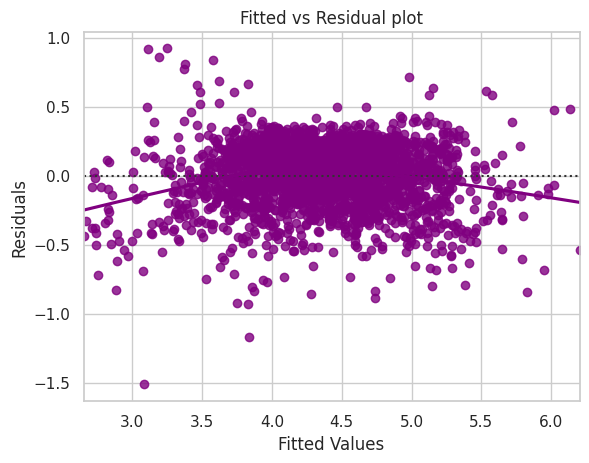

In [346]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

**Observations**

- We see no pattern in the plot above.
- Hence, the assumptions of linearity and independence are satisfied.

### TEST FOR NORMALITY

- We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.
- If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.
- If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.

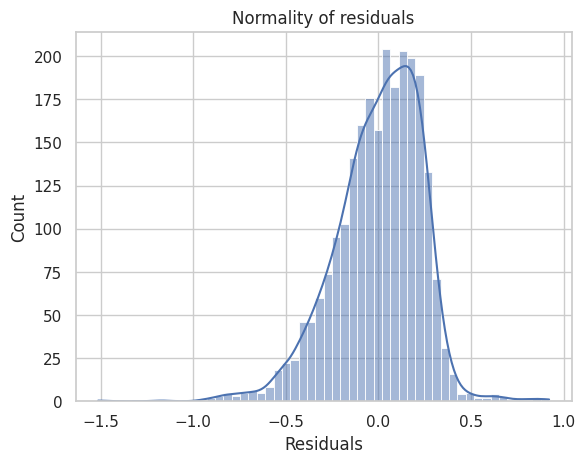

In [347]:
sns.histplot(data=df_pred, x="Residuals", kde=True)
plt.title("Normality of residuals")
plt.show()

**Observations**

- The histogram of residuals does have a slight bell shape.
- Let's check the Q-Q plot.

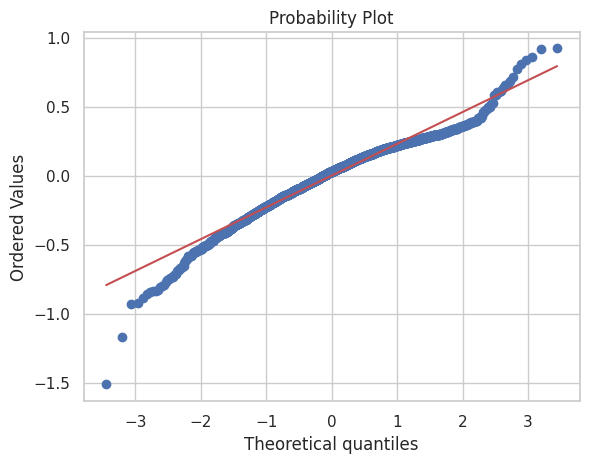

In [348]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

**Observations**

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [349]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=np.float64(0.967695082990057), pvalue=np.float64(6.983856712612358e-23))

**Observations**

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal. However, as an approximation, we can accept this distribution as close to being normal.
- So, the assumption is satisfied.

### TEST FOR HOMOSCEDASTICITY

- Homoscedascity: If the variance of the residuals is symmetrically distributed across the regression line, then the data is said to be homoscedastic.

- Heteroscedascity: If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic.

Why the test?

- The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

**How to check for homoscedasticity?**

- The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
- The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.
  - Null hypothesis: Residuals are homoscedastic
  - Alternate hypothesis: Residuals have heteroscedasticity

**How to fix if this assumption is not followed?**

- Heteroscedasticity can be fixed by adding other important features or making transformations.

In [350]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', np.float64(1.0087504199106758)),
 ('p-value', np.float64(0.4401970650667301))]

- **Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

- **Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction.**

## Final Model

In [351]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [352]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Tue, 08 Jul 2025   Prob (F-statistic):               0.00
Time:                           22:25:34   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [353]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [354]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


## Actionable Insights and Recommendations

1. The model explains ~84% of the variation in the data and can predict the normalized used device price within ~4.6%, so it is good for predictive purposes.


2. The most significant predictors of the normalized used device price are the normalized price of a new device of the same model, the weight of the devices screen, the resolution of the rear and front cameras, the years since the original release of the device, the amount of RAM, the availability of 4G and 5G network.

    - A unit increase in the normalized new model price will result in a 0.4415 unit increase in the normalized used device price, all other variables held constant
    - A unit increase in the amount of RAM will result in a 0.0207 unit increase in the normalized used device price, all other variables held constant
    - A unit increase in the years since the original release of the device will result in a 0.0292 unit decrease in the normalized used device price, all other variables held constant
    - A unit increase in the resolution of the front camera will result in a 0.0138 unit increase in the normalized used device price, all other variables held constant
    - A unit increase in the resolution of the rear camera will result in a 0.0210 unit increase in the normalized used device price, all other variables held constant
    - The normalized used device price for devices with 4G connectivity will be 0.0502 units more than those without 4G connectivity


3. ReCell should look to attract people who want to sell used phones and tablets which were originally released in recent years and have good front and rear camera resolutions.


4. Devices with more RAM and 4G connectivity are also good candidates for reselling to certain customer segments.


5. They should also try to gather and put up phones having a high price for new models to try and increase revenue.


6. Additional data regarding customer demographics (age, gender, income, etc.) can be collected and analyzed to gain better insights into the preferences of customers across different price segments.


7. ReCell can also look to sell other used gadgets, like smart watches, which might attract certain segments of customers.


Insights **bold text**

- 1 unit increase in screen size (in cm) leads to an increase in normalized used price by 0.0391 euro.
- For every gram increase in weight ,the normalized used price increases by 0.2808 euros
- 1 unit increase in all the independent variable from the model increases the normalized used price of the phone.
- If the phone is 4g enabled, the normalized price increases by 0.0386 euros
- The screen size which are less than 10 cm is priced high and 30 cm screen size is pricess less than 20 cms
- The price is impacted by screen_size,main_camera_mp,selfie_camera_mp,int_memory,normalized_new_price,weight_log,4g enable and not impacted by 5g,ram,battery,release year, days_used
- days used should have an impact on the used price .There are lot of phones which are older and the normalized proce is very high
- Battery capacity should have impact on the used price. There are some battery capacity range between 4000 mAh and 5000 mAH has high used price
- Most of the os used is Android
- There are few apple brand phone which uses os other than IOS . Not sure we need that in the data since new updates only in IOS os for apple.
- Huaweii brand has the highest percentage of selfie camera size more than 8 mpg followed by Oppo and Vivo
- Sony has the highest percentage of main camera resolution followed by Motorolla for camera resolution size more than 16 mp
- Percentage of rear camera resolution more than 16 mpg is not in more than half the brand name in the data

**Recommendations**

- Reduce the used price of 4g avaiablility phone and add more 5g enabled phones
- Reduce the price when the used phone is older
- Increase the normalized used price when the battery capacity is high and viceversa
- Have brands distibution of os other than Android.
- Weight and used price has no relations so we may need to reduce the price when the weight is higher
- percentage of selfie camera resolution more than 8 mpg is less for most of the brands. Have more brands with selfie camers resolution
- Include more rear camera resolution greater than 16 mpg in data